# **Spotify Linear Regression**

## **Appendix**

**A. Business Problem**

**B. Dataset**

**C. Executive Summary**

**D. Detailing the Model, Assumptions, and Visualizing**
1. EDA and Cleaning  
2. Validating Assumptions  
3. Training and Testing Split  
4. Ordinary Least Squares  
5. Predictive Fit and Decision Theoretic Fit and Interpretation 
6. Visualizing Interval Estimates  

**E. Interpretation and Recommendation**

# A. Business Problem

Explain the business problem here.

Explain objective function (maximizing danceability given ____)

# B. Dataset

This is a dataset that contains the top 10000 songs between 1950 and October 2024 from the Australian Recording Industry Association and Billboard charts. The songs were scraped from Spotify's API: https://www.kaggle.com/datasets/joebeachcapital/top-10000-spotify-songs-1960-now

These are the relevant variables in this analysis:

**Danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.



# C. Executive Summary

The whole story in one sentence and the essential takeaway

# D. Detailing the Model, Assumptions, and Visualizing

Below we cleaned the dataset by doing x y and z, we are using a ______ (e.g. quadratic loss function) where our outcome for prediciton is danceability

## (1) EDA and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np

df2 = pd.read_csv('top_10000_1950-now.csv')

First we examined our dataset and kept the identifier and track attribute fields that we would like to examine for modeling. We kept **Track URI** as a unique identifier, and **Danceability**, **Energy**, **Key**, **Loudness**, **Mode**, **Speechiness**, **Acousticness**, **Instrumentalness**, **Liveness**, **Valence**, **Tempo**, **Track Duration (ms)**, **Artist Genres**, and **Explicit** as variables worth investigating.

**Popularity** is a field we would like to investigate further, but would introduce a specific time bias. Rather than representing the popularity of these tracks over the ~70 year time period of songs in the dataset, it is a measure of the popularity of tracks at the time this dataset was scraped.

In [2]:
pd.set_option('display.max_columns', None)
df2.head()

Track URI                           Track Name  \
0  spotify:track:0vNPJrUrBnMFdCs8b2MTNG                                Fader   
1  spotify:track:0NpvdCO506uO58D4AbKzki                               Sherry   
2  spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P  I Took A Pill In Ibiza - Seeb Remix   
3  spotify:track:59lq75uFIqzUZcgZ4CbqFG                   Let Go for Tonight   
4  spotify:track:7KdcZQ3GJeGdserhK61kfv          The Way I Want To Touch You   

                                       Artist URI(s)  \
0              spotify:artist:4W48hZAnAHVOC2c8WH8pcq   
1              spotify:artist:6mcrZQmgzFGRWf7C0SObou   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa, spotify...   
3              spotify:artist:7qRll6DYV06u2VuRPAVqug   
4              spotify:artist:7BEfMxbaqx6dOpbtlEqScm   

                     Artist Name(s)                             Album URI  \
0                   The Temper Trap  spotify:album:0V59MMtgoruvEqMv18KAOH   
1  Frankie Valli & The Four Seasons  spotify:album:0NUEQILaBzavnzcMEs4buZ   
2                 Mike Posner, Seeb  spotify:album:1Tz3Ai1guEFf4hV3d9i17K   
3                             Foxes  spotify:album:5AQ7uKRSpAv7SNUl4j24ru   
4                Captain & Tennille  spotify:album:3GUxesVyOehInaxJyCTh6d   

                                       Album Name  \
0                       Conditions (Tour Edition)   
1  The Very Best of Frankie Valli & The 4 Seasons   
2                                At Night, Alone.   
3                               Glorious (Deluxe)   
4                      Love Will Keep Us Together   

                     Album Artist URI(s)              Album Artist Name(s)  \
0  spotify:artist:4W48hZAnAHVOC2c8WH8pcq                   The Temper Trap   
1  spotify:artist:6mcrZQmgzFGRWf7C0SObou  Frankie Valli & The Four Seasons   
2  spotify:artist:2KsP6tYLJlTBvSUxnwlVWa                       Mike Posner   
3  spotify:artist:7qRll6DYV06u2VuRPAVqug                             Foxes   
4  spotify:artist:7BEfMxbaqx6dOpbtlEqScm                Captain & Tennille   

  Album Release Date                                    Album Image URL  \
0               2009  https://i.scdn.co/image/ab67616d0000b273f86ae8...   
1         2003-01-14  https://i.scdn.co/image/ab67616d0000b273b96c21...   
2         2016-05-06  https://i.scdn.co/image/ab67616d0000b273a19be7...   
3         2014-05-12  https://i.scdn.co/image/ab67616d0000b273ae5c7d...   
4         1975-01-01  https://i.scdn.co/image/ab67616d0000b273e21a28...   

   Disc Number  Track Number  Track Duration (ms)  \
0            1             6               192373   
1            1             1               152160   
2            1            13               197933   
3            1             5               238413   
4            1             3               163586   

                                   Track Preview URL  Explicit  Popularity  \
0  https://p.scdn.co/mp3-preview/14264bd1501d2723...     False           0   
1  https://p.scdn.co/mp3-preview/e3f765262ebc349e...     False          54   
2  https://p.scdn.co/mp3-preview/7bae6aac6d699135...      True          63   
3  https://p.scdn.co/mp3-preview/84a003d72f9f1468...     False          39   
4  https://p.scdn.co/mp3-preview/9e7a4a7b7dc56dc3...     False          35   

           ISRC                  Added By              Added At  \
0  GBZUZ0900014  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
1  USRH10175197  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
2  USUM71509342  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
3  GBARL1301249  spotify:user:bradnumber1  2021-08-08T09:26:31Z   
4  USAM10110025  spotify:user:bradnumber1  2021-08-08T09:26:31Z   

                                       Artist Genres  Danceability  Energy  \
0               indietronica,modern rock,shimmer pop         0.532   0.760   
1  adult standards,bubblegum pop,doo-wop,lounge,n...         0.703   0.478   
2          dance pop,pop,pop dance,pop rap,pop dance         0.664   0.714   
3      

In [3]:
# Specify columns to keep in deeper analysis
keep_columns = [
    'Track URI', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
    'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Tempo', 'Track Duration (ms)',
    'Artist Genres', 'Explicit'
]
df2_subset = df2[keep_columns].copy()

### Visualize and measure kurtosis and skew

We then visualized the distributions of our numeric columns to guage which variables may be in need of normalization to better meet the assumptions of our model. We further looked at the measurements for kurtosis and skew. This code returns Fisher's definition of kurtosis, or excess kurtosis. Ideally, each variable has a skew of 0 and an excess kurtosis of 0 (meaning a standard kurtosis of 3). Based on these diagnostics we found that Speechiness, Acousticness, Instrumentalness, Liveness, and Track Duration (ms) were variables in need of transformation. 

Below, we log transformed these right-skewed variables and found an improvement in Speechiness, Instrumentalness, and Liveness. Track Duration (ms) is very leptokurtic, so a log-transformation was ineffective. For Acousticness, a log-transformation overcorrected the skew to be almost a reflection of the original skew. So, we will move forward without fully completing our normality assumptions.

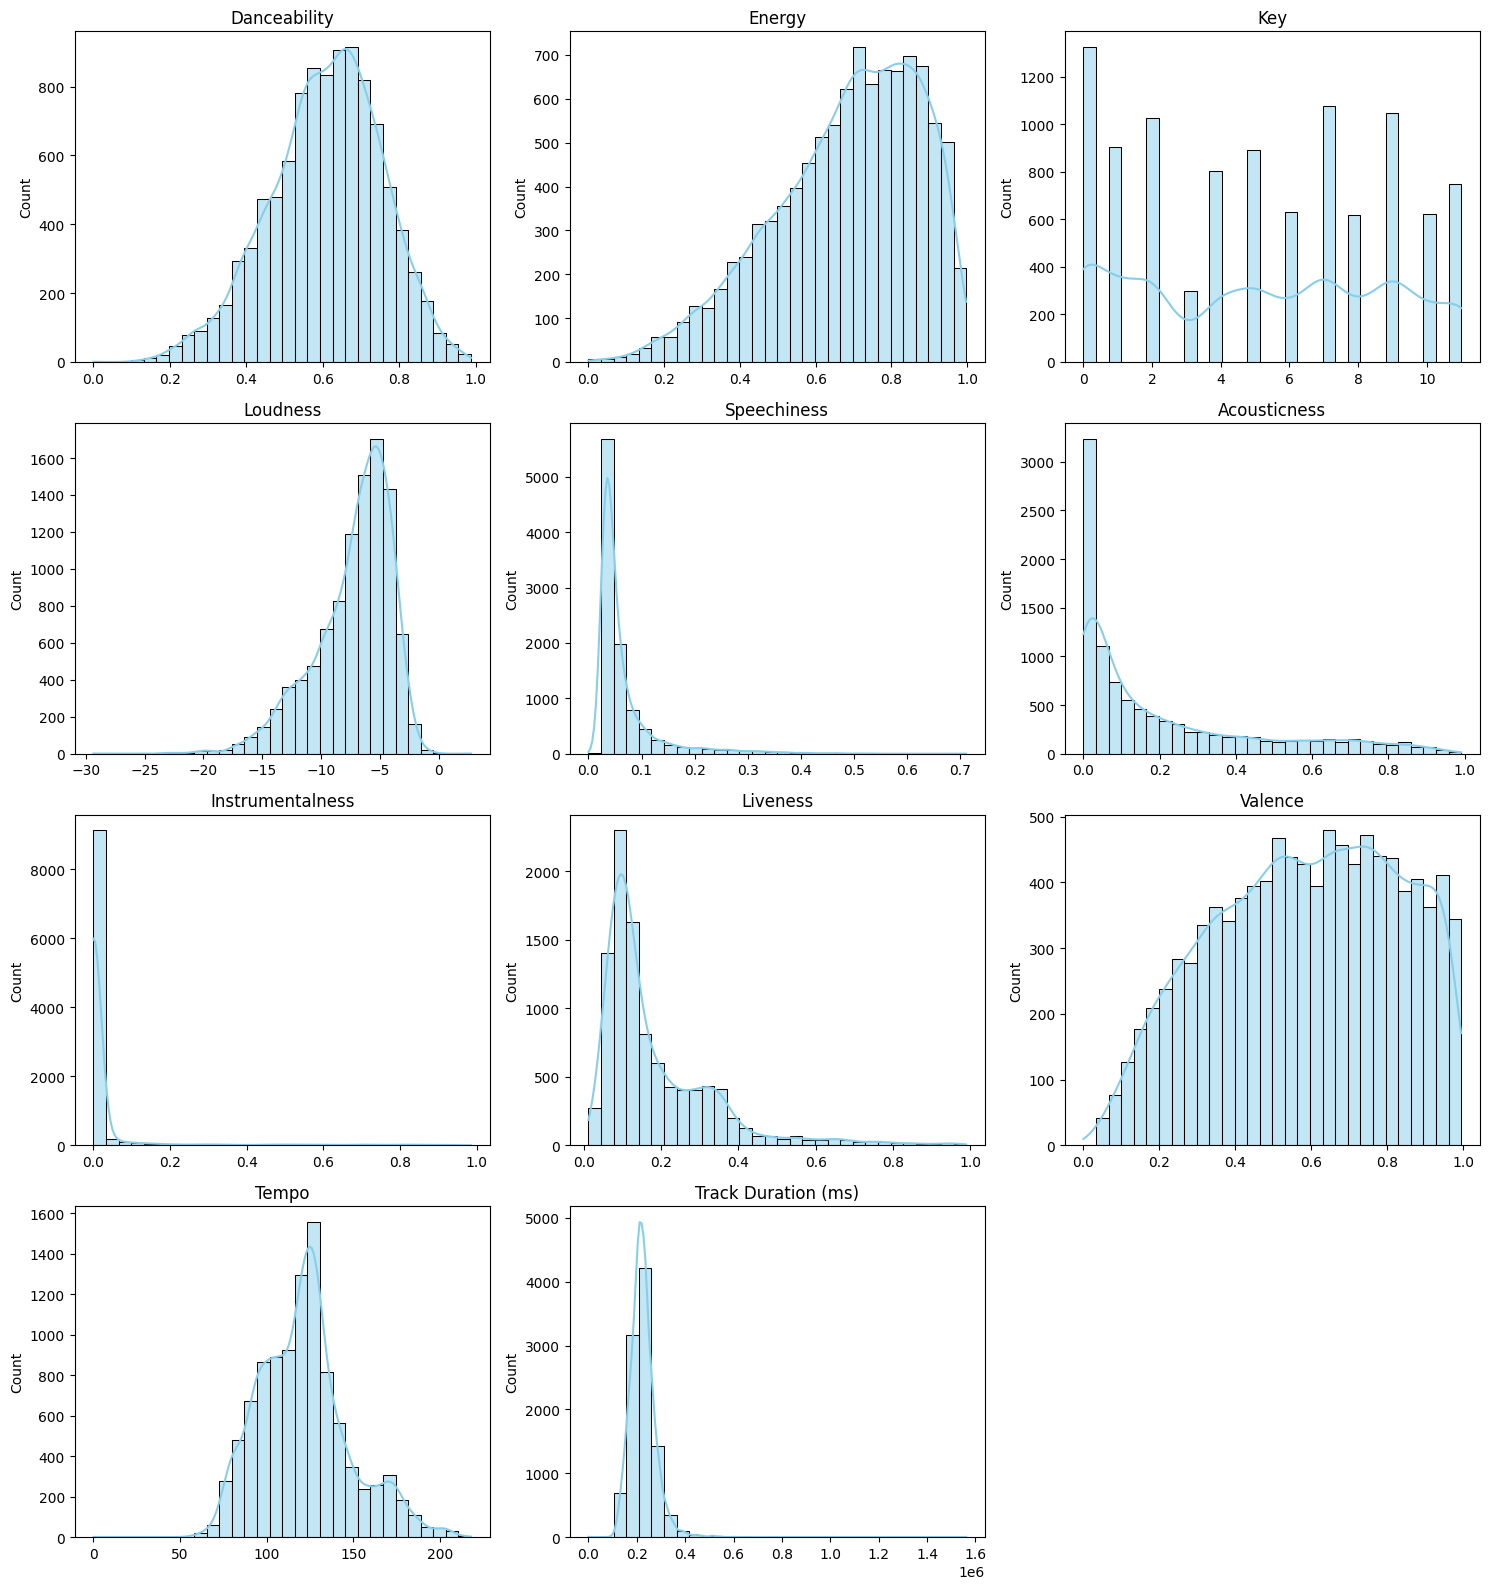

In [4]:
# Select numeric columns
numeric_cols = [
    'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Track Duration (ms)'
]

# Set up the plot grid
num_cols = 3  # number of plots per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*5, num_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df2_subset[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
df2_subset[numeric_cols] = df2_subset[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate skewness and kurtosis
stats_df = pd.DataFrame({
    'Skewness': df2_subset[numeric_cols].apply(lambda x: skew(x.dropna())),
    'Kurtosis': df2_subset[numeric_cols].apply(lambda x: kurtosis(x.dropna(), fisher=True))
})

stats_df

Skewness   Kurtosis
Danceability        -0.313820  -0.078175
Energy              -0.641341  -0.169417
Key                  0.026116  -1.292687
Loudness            -1.050121   1.246128
Speechiness          3.281138  13.280137
Acousticness         1.296880   0.573714
Instrumentalness     5.224732  28.145979
Liveness             2.077852   5.344333
Valence             -0.201451  -0.954207
Tempo                0.530200   0.308520
Track Duration (ms)  2.964346  46.707199

### Log transform skewed fields

In [6]:
skewed_cols = ['Speechiness', 'Instrumentalness', 'Liveness']

df_transformed = df2_subset.copy()

for col in skewed_cols:
    min_val = df_transformed[col].min()
    if min_val <= 0:
        # Shift to make all values positive
        shift = abs(min_val) + 1e-6
    else:
        shift = 0
    df_transformed[col + '_log'] = np.log(df_transformed[col] + shift)

# Check new skewness and kurtosis
log_cols = [col + '_log' for col in skewed_cols]
skew_kurt = pd.DataFrame({
    'Skewness': df_transformed[log_cols].skew(),
    'Kurtosis': df_transformed[log_cols].kurtosis()
})

print(skew_kurt)

                      Skewness   Kurtosis
Speechiness_log       0.705233  11.122522
Instrumentalness_log  0.922560  -0.349456
Liveness_log          0.324278  -0.305828


We then renamed the variables in our dataframe to have consistent formatting (lowercase with underscores). We also re-visualized our transformed variables: speechiness_log, instrumentalness_log, and liveness_log.

In [7]:
# Rename and compile new df with some variables transformed

# Start from df2_subset
df_final = df2_subset.copy()

# Rename columns
df_final.rename(columns={
    'Track URI': 'track_id',
    'Danceability': 'danceability',
    'Energy': 'energy',
    'Key': 'key',
    'Loudness': 'loudness',
    'Mode': 'mode',
    'Speechiness': 'speechiness',
    'Acousticness': 'acousticness',
    'Instrumentalness': 'instrumentalness',
    'Liveness': 'liveness',
    'Valence': 'valence',
    'Tempo': 'tempo',
    'Track Duration (ms)': 'track_duration_ms',
    'Artist Genres': 'artist_genres',
    'Explicit': 'explicit'
}, inplace=True)

# Log-transform selected skewed variables
for col in ['speechiness', 'instrumentalness', 'liveness']:
    min_val = df_final[col].min()
    shift = abs(min_val) + 1e-6 if min_val <= 0 else 0
    df_final[col + '_log'] = np.log(df_final[col] + shift)

# Display final dataframe columns
df_final.head()

track_id  danceability  energy   key  loudness  \
0  spotify:track:0vNPJrUrBnMFdCs8b2MTNG         0.532   0.760  11.0    -7.123   
1  spotify:track:0NpvdCO506uO58D4AbKzki         0.703   0.478   7.0    -8.062   
2  spotify:track:1MtUq6Wp1eQ8PC6BbPCj8P         0.664   0.714   7.0    -6.645   
3  spotify:track:59lq75uFIqzUZcgZ4CbqFG         0.543   0.808   9.0    -6.615   
4  spotify:track:7KdcZQ3GJeGdserhK61kfv         0.664   0.585   0.0    -7.062   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0   0.0       0.0353      0.000101          0.690000    0.0752    0.158   
1   1.0       0.0441      0.626000          0.000000    0.1130    0.734   
2   0.0       0.1110      0.035300          0.000008    0.0843    0.710   
3   0.0       0.0632      0.042900          0.000002    0.3260    0.299   
4   0.0       0.0248      0.624000          0.000112    0.3430    0.597   

     tempo  track_duration_ms  \
0  134.974             192373   
1  117.562             152160   
2  101.969             197933   
3  140.064             238413   
4  111.290             163586   

                                       artist_genres  explicit  \
0               indietronica,modern rock,shimmer pop     False   
1  adult standards,bubblegum pop,doo-wop,lounge,n...     False   
2          dance pop,pop,pop dance,pop rap,pop dance      True   
3                     electropop,metropopolis,uk pop     False   
4                   mellow gold,soft rock,yacht rock     False   

   speechiness_log  instrumentalness_log  liveness_log  
0        -3.343844             -0.371062     -2.587604  
1        -3.121273            -13.815511     -2.180367  
2        -2.198216            -11.572675     -2.473373  
3        -2.761435            -12.844732     -1.120858  
4        -3.696871             -9.088123     -1.070025

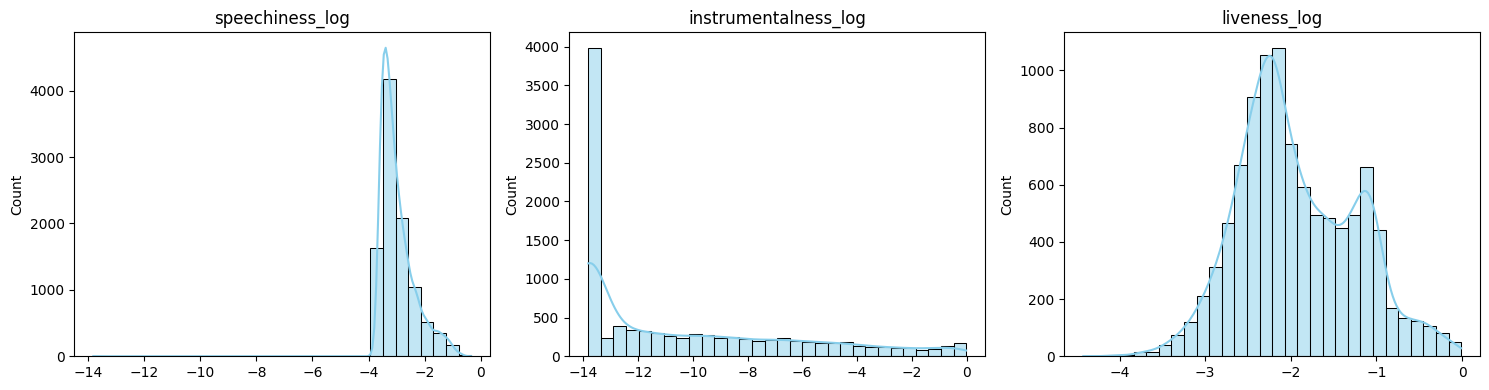

In [8]:
# List of numeric columns to visualize
numeric_cols = [
    'speechiness_log', 'instrumentalness_log', 'liveness_log'
]

num_cols = 3  # number of plots per row
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*5, num_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_final[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Sort by artist genre

Our Artist Genres field in the original dataset had more than 900 specific fields. We wanted to include some component of genre in this analysis, so we are using artist genre as a proxy for track genre. We used ChatGPT to sort these subgenres into the following genres: rock, pop, r&b, edm, classical, jazz, country, folk, punk, metal, rap, hip-hop, blues, reggae, world-music, and other.

Music genres are notoriously fuzzy with overlap. The Billboard and Grammy Awards have award/charter categories including R&B, Rap, Country, Rock, Latin, K-Pop, Dance/Electronic, Christian, Gospel, Contemporary Instrumental, Alternative, New Age, Jazz, Reggae, Global Music, Children's, Comedy, Spoken Word, Classical, Musical Theater, and Music for Visual Media or Film. The main variations between this and the genres we defined are punk, metal, and folk, which some may consider subgenres under larger umbrella terms. In a real business case we would have sought feedback from the major record label and production studio for defining specific genres.

Here is the link to the ChatGPT chat where we received a genre_mapping dictionary of less-granular genres: https://chatgpt.com/share/68d37cb8-07c0-8007-bd33-d76d5c1b28fc

In [9]:
# Split comma-separated genres into lists
df2_subset['Artist Genres List'] = df2_subset['Artist Genres'].str.split(',')

# Explode the lists so each genre gets its own row
df_exploded = df2_subset.explode('Artist Genres List')

# Strip whitespace
df_exploded['Artist Genres List'] = df_exploded['Artist Genres List'].str.strip()

# Get unique genres
unique_genres = df_exploded['Artist Genres List'].unique()
print(f"Number of unique genres: {len(unique_genres)}")

Number of unique genres: 908


In [10]:
genre_mapping = {
"rock": [
'modern rock', 'rock-and-roll', 'rockabilly', 'soft rock', 'yacht rock', 'album rock',
'classic rock', 'rock', 'hard rock', 'classic garage rock', 'merseybeat', 'australian rock',
'folk rock', 'pop rock', 'post-grunge', 'alternative rock', 'dance rock', 'electronic rock',
'kiwi rock', 'psychedelic rock', 'glam rock', 'piano rock', 'british invasion', 'post-punk',
'uk post-punk', 'indie rock', 'australian alternative rock', 'australian indie rock',
'british alternative rock', 'punk', 'adelaide punk', 'ska punk', 'skate punk', 'emo',
'pop punk', 'neon pop punk', 'britpop', 'britpop revival', 'garage rock', 'garage rock revival',
'psychedelic blues-rock', 'psychedelic folk rock', 'progressive rock', 'progressive metal',
'metal', 'glam metal', 'nu metal', 'metalcore', 'stoner metal', 'proto-metal', 'psychedelic punk',
'psychobilly', 'screamo', 'post-punk', 'pub rock', 'slacker rock', 'shoegaze', 'noise rock',
'spacegrunge', 'alternative pop rock', 'modern alternative rock', 'modern power pop',
'power pop', 'rock drums', 'cosmic american', 'swamp rock', 'heartland rock', 'surf music',
'irish rock', 'german rock', 'boston rock', 'canadian rock', 'canadian metal', 'german hard rock',
'swedish hard rock', 'swedish melodic rock', 'swedish indie rock', 'welsh rock', 'dutch rock',
'argentine rock', 'rock nacional', 'rock independant francais', 'indie rock italiano',
'acid rock', 'african rock', 'alaska indie', 'alternative dance', 'art rock', 'athens indie', 'auckland indie', 'aussie emo', 'australian alternative pop', 'australian garage punk', 'australian indie', 'australian psych', 'australian surf rock', 'beatlesque', 'belgian rock', 'bergen indie', 'brighton indie', 'brisbane indie', 'british indie rock', 'brooklyn indie', 'bubblegrunge', 'c86', 'canadian indie', 'canadian rockabilly', 'canadian trap', 'canterbury scene', 'celtic rock', 'chapel hill sound', 'charlottesville indie', 'chicago indie', 'christian alternative rock', 'classic canadian rock', 'comedy rock', 'coventry indie', 'czech singer-songwriter', 'derby indie', 'detroit rock', 'devon indie', 'dunedin sound', 'dutch prog', 'experimental rock', 'finnish alternative rock', 'flute rock', 'freakbeat', 'fremantle indie', 'french rock', 'french shoegaze', 'french synthpop', 'grebo', 'grunge', 'icelandic indie', 'icelandic rock', 'indie salvadoreno', 'israeli rock', 'jam band', 'la indie', 'lancashire indie', 'leicester indie', 'liverpool indie', 'madchester', 'manchester indie', 'melbourne indie', 'mexican classic rock', 'michigan indie', 'modern folk rock', 'nashville indie', 'neo-psychedelic', 'new jersey indie', 'northern irish indie', 'nottingham indie', 'olympia wa indie', 'ontario indie', 'oxford indie', 'paisley underground', 'palm desert scene', 'perth indie', 'philly indie', 'pop emo', 'portland indie', 'pov: indie', 'rap rock', 'rochester ny indie', 'rock keyboard', 'rock of gibraltar', 'rock progressif francais', 'roots rock', 'sacramento indie', 'scottish indie', 'scottish rock', 'sheffield indie', 'sleaze rock', 'south african rock', 'southern rock', 'spanish invasion', 'stoner rock', 'symphonic rock', 'synth prog', 'tempe indie', 'traditional rockabilly', 'trop rock', 'uk rockabilly', 'underground power pop', 'german pop rock', 'pittsburgh rock', 'zolo'
],
"pop": [
'shimmer pop', 'bubblegum pop', 'dance pop', 'pop', 'pop dance', 'electropop', 'metropopolis',
'uk pop', 'mellow gold', 'adult standards', 'doo-wop', 'lounge', 'post-teen pop', 'art pop',
'canadian pop', 'girl group', 'boy band', 'viral pop', 'singer-songwriter pop', 'candy pop',
'pixie', 'post-disco', 'sunshine pop', 'neo mellow', 'pop rock', 'sophisti-pop', 'pop soul',
'indie pop', 'modern indie pop', 'bedroom pop', 'indie electropop', 'indie pop rap', 'indie soul',
'gauze pop', 'barbadian pop', 'pop quebecois', 'pop urbaine', 'pop edm', 'pop house', 'latin pop',
'italian pop', 'icelandic pop', 'french pop', 'norwegian pop', 'romanian pop', 'austrian pop',
'brazilian pop', 'scandinavian pop', 'nz pop', 'canadian electropop', 'canadian pop punk',
'canadian psychedelic', 'canadian singer-songwriter', 'swedish pop', 'swedish indie pop',
'baroque pop', 'operatic pop', 'chamber pop', 'italian adult pop', 'collage pop', 'la pop',
'viral trap', 'hyperpop', 'antiviral pop', 'modern alternative pop', 'bboy', 'pixel', 'stomp pop',
'deep dance pop', 'bubblegum dance', 'deep eurodance', 'deep disco', 'classic belgian pop',
'belgian pop', 'belgian dance', 'super eurobeat', 'italo disco', 'italo dance', 'italo house',
'euphoric hardstyle', 'classic hardstyle', 'deep minimal techno', 'melodic dubstep',
'deep tropical house', 'tropical', 'trance', 'vocal trance', 'hands up', 'melbourne bounce',
'melbourne bounce international', 'bouncy house', 'future house', 'bass house', 'deep tech house',
'tech house', 'progressive house', 'classic house', 'disco house', 'tribal house', 'house',
'electro house', 'progressive electro house', 'hi-nrg', 'deep euro house', 'float house',
'microhouse', 'garage house', 'vocal house', 'dj remix product', 'itopop', 'pop violin',
'post-disco', 'ethereal wave', 'etherpop', 'dream pop', 'indietronica', 'aussietronica',
'a cappella', 'acoustic pop', 'alt z', 'alternative pop', 'ambient pop', 'australian americana', 'australian electropop', 'australian pop', 'australian talent show', 'austropop', 'bahamian pop', 'brill building pop', 'classic danish pop', 'classic girl group', 'classic greek pop', 'classic nz pop', 'classic schlager', 'classic swedish pop', 'classic uk pop', 'colombian pop', 'dance-punk', 'danish pop', 'dansktop', 'dark pop', 'deep adult standards', 'deep soft rock', 'deep talent show', 'disco', 'dutch pop', 'early synthpop', 'easy listening', 'electropowerpop', 'escape room', 'europop', 'french indie pop', 'hopebeat', 'icelandic singer-songwriter', 'indie poptimism', 'irish pop', 'israeli pop', 'italian lounge', 'jangle pop', 'jordanian pop', 'k-pop', 'k-pop boy group', 'k-pop girl group', 'latin arena pop', 'latin viral pop', 'mandopop', 'mexican pop', 'modern alternative pop', 'neo-synthpop', 'neue deutsche welle', 'new romantic', 'new wave', 'new wave pop', 'noise pop', 'nyc pop', 'permanent wave', 'pop nacional', 'pop reggaeton', 'scandipop', 'schlager', 'scottish new wave', 'shiver pop', 'social media pop', 'solo wave', 'south african pop dance', 'space age pop', 'swedish electropop', 'swedish idol pop', 'swedish synthpop', 'synthpop', 'taiwan pop', 'talent show', 'teen pop', 'torch song', 'transpop', 'uk alternative pop', 'variete francaise', 'vocal harmony group', 'deep new wave', 'german pop', 'nederpop'
],
"r&b": [
'r&b', 'urban contemporary', 'neo soul', 'contemporary r&b', 'new jack swing', 'pop r&b',
'alternative r&b', 'deep r&b', 'gospel r&b', 'soul blues', 'rhythm and blues', 'quiet storm',
'classic soul', 'southern soul', 'uk contemporary r&b', 'canadian r&b', 'australian r&b',
'dark r&b', 'funk', 'funk pop', 'funk rock', 'funktronica', 'jazz funk', 'soul',
'beach music', 'brit funk', 'british soul', 'canadian contemporary r&b', 'chicago soul', 'funk rj', 'indie r&b', 'instrumental funk', 'instrumental soul', 'memphis soul', 'minneapolis sound', 'modern funk', 'new orleans funk', 'new orleans soul', 'northern soul', 'p funk', 'philly soul', 'psychedelic soul', 'souldies', 'swedish soul', 'synth funk', 'motown'
],
"edm": [
'edm', 'diva house', 'eurodance', 'hip house', 'filter house', 'uk dance', 'electro',
'electronica', 'big beat', 'nu skool breaks', 'trip hop', 'brostep', 'progressive electro house',
'electro house', 'slap house', 'deep groove house', 'deep house', 'progressive house',
'house', 'progressive trance', 'trance', 'future house', 'bass house', 'deep tech house',
'tech house', 'electroclash', 'microhouse', 'garage house', 'vocal house', 'disco house',
'tribal house', 'classic house', 'classic hardstyle', 'euphoric hardstyle', 'hands up',
'hi-nrg', 'melbourne bounce', 'melbourne bounce international', 'bouncy house', 'deep euro house',
'float house', 'bubble trance', 'vapor twitch', 'deep disco', 'deep dance pop', 'italo dance',
'italo disco', 'italo house', 'belgian dance', 'german dance', 'dutch house', 'dutch trance',
'finnish edm', 'electronic trap', 'complextro', 'progressive electro house',
'2-step', 'acid house', 'ambient house', 'australian dance', 'australian house', 'belgian edm', 'big room', 'bolobedu house', 'breakbeat', 'breaks', 'canadian electronic', 'cantaditas', 'classic dubstep', 'classic progressive house', 'cyberpunk', 'dancefloor dnb', 'danish electronic', 'deep disco house', 'downtempo', 'dream trance', 'drum and bass', 'dutch edm', 'electra', 'electro swing', 'electrofox', 'experimental house', 'fidget house', 'filthstep', 'flamenco electronica', 'frankfurt electronic', 'freestyle', 'future garage', 'gabber', 'german house', 'german techno', 'german trance', 'hamburg electronic', 'happy hardcore', 'hardcore techno', 'hypertechno', 'intelligent dance music', 'italian trance', 'jungle', 'latin house', 'minimal techno', 'moombahton', 'new beat', 'new rave', 'nu disco', 'proto-techno', 'ragga jungle', 'rave', 'sky room', 'south african house', 'speed garage', 'stutter house', 'swedish tropical house', 'trancecore', 'tropical house', 'uk dnb', 'uk funky', 'uk garage', 'uk house', 'uk tech house', 'vintage french electronic'
],
"classical": [
'opera', 'classical tenor', 'baroque pop', 'gregorian dance', 'classical', 'classical soundtrack',
'classical adult', 'light music', "man's orchestra",
'italian tenor'
],
"jazz": [
'jazz', 'jazz pop', 'vocal jazz', 'jazz blues', 'soul jazz', 'jazz fusion', 'jazz guitar',
'jazz quartet', 'jazz piano', 'jazz saxophone', 'jazz clarinet', 'jazz organ', 'smooth jazz',
'bebop', 'hard bop', 'contemporary post-bop', 'chicago bop', 'swing', 'swing italiano', 'acid jazz',
'electro jazz',
'big band', 'cabaret', 'contemporary vocal jazz', 'dixieland', 'hammond organ', 'harlem renaissance', 'jazz cover', 'jazz rock', 'jazz trumpet', 'new orleans jazz', 'ska jazz', 'smooth saxophone', 'south african jazz', 'swedish jazz'
],
"country": [
'contemporary country', 'country', 'country dawn', 'country road', 'classic country pop',
'country rock', 'classic australian country', 'classic texas country', 'outlaw country',
'cowboy western', 'nashville sound', 'traditional country', 'western swing', 'country pop',
'neo-traditional country', 'texas blues', 'australian country', 'bush ballad', 'country gospel',
'modern country rock', 'irish country', 'south african country', 'classic nz country',
'alternative country', 'arkansas country', 'bakersfield sound', 'banjo', 'canadian country', 'classic oklahoma country', 'honky tonk', 'honky-tonk piano', 'new americana', 'swedish country', 'truck-driving country', 'uk americana', 'yodeling'
],
"folk": [
'folk', 'folk-pop', 'singer-songwriter', 'nz singer-songwriter', 'scottish singer-songwriter',
'american folk revival', 'indie folk', 'australian indie folk', 'neo-singer-songwriter',
'chamber folk', 'irish folk', 'black americana', 'indie anthem-folk', 'cosmic american',
'acoustic cover', 'anti-folk', 'austin singer-songwriter', 'australian singer-songwriter', 'british folk', 'canadian celtic', 'canadian folk', 'celtic', 'ectofolk', 'gen z singer-songwriter', 'irish pub song', 'irish singer-songwriter', 'lilith', 'modern indie folk', 'nz folk', 'psychedelic folk', 'shanty', 'stomp and holler'
],
"punk": [
'punk', 'adelaide punk', 'ska punk', 'skate punk', 'pop punk', 'neon pop punk', 'emo',
'post-punk', 'uk post-punk', 'art punk', 'glam punk', 'psychobilly', 'hardcore punk',
'anarcho-punk', 'synth punk', 'cowpunk', 'punk blues', 'british punk', 'britcore', 'mod revival',
'acoustic punk', 'boston punk', 'canadian punk', 'chicago hardcore', 'chicago punk', 'northern irish punk', 'protopunk', 'riot grrrl', 'ruta destroy', 'socal pop punk', 'texas pop punk'
],
"metal": [
'metal', 'glam metal', 'nu metal', 'metalcore', 'proto-metal', 'industrial metal', 'industrial rock',
'hard rock', 'german metal', 'argentine heavy metal', 'birmingham metal', 'stoner metal',
'psychedelic punk', 'thrash metal', 'industrial', 'death metal', 'black metal',
'alternative metal', 'comic metal', 'funk metal', 'hel', 'nwobhm', 'old school thrash', 'rap metal'
],
"rap": [
'rap', 'pop rap', 'hip pop', 'old school hip hop', 'queens hip hop', 'atl hip hop',
'dirty south rap', 'old school atlanta hip hop', 'southern hip hop', 'trap', 'chicago rap',
'melodic rap', 'detroit hip hop', 'south carolina hip hop', 'trap soul', 'latin hip hop',
'puerto rican pop', 'trap latino', 'miami bass', 'miami hip hop', 'atl trap', 'political hip hop',
'pittsburgh rap', 'new jersey underground rap', 'chicano rap', 'nigerian hip hop', 'dfw rap',
'new orleans rap', 'houston rap', 'rhode island rap', 'oakland hip hop', 'westcoast flow',
'birmingham hip hop', 'london rap', 'texas latin rap', 'k-rap', 'nashville hip hop',
'alabama rap', 'australian trap', 'battle rap', 'cali rap', 'dark trap', 'gangster rap', 'horrorcore', 'jazz rap', 'meme rap', 'new jersey rap', 'nyc rap', 'philly rap', 'rap francais', 'rap kreyol', 'rap latina', 'sad rap', 'st louis rap', 'texas pop punk', 'trap queen', 'traphall', 'urbano latino', 'west coast rap'
],
"hip-hop": [
'hip hop', 'golden age hip hop', 'alternative hip hop', 'australian hip hop', 'australian underground hip hop',
'underground hip hop', 'brooklyn drill', 'drill', 'afroswing', 'afrofuturism', 'afro soul',
'bboy', 'beatboxing', 'experimental hip hop', 'traprun', 'viral trap', 'comedy rap', 'emo rap',
'asian american hip hop', 'atlanta bass', 'atlantic canada hip hop', 'australian indigenous hip hop', 'bronx hip hop', 'birmingham grime', 'canadian hip hop', 'canadian old school hip hop', 'chicago drill', 'conscious hip hop', 'crunk', 'deep underground hip hop', 'desi hip hop', 'east coast hip hop', 'french hip hop', 'g funk', 'grime', 'hardcore hip hop', 'harlem hip hop', 'hyphy', 'jamaican hip hop', 'kentucky hip hop', 'korean old school hip hop', 'lgbtq+ hip hop', 'melodic drill', 'memphis hip hop', 'minnesota hip hop', 'mississippi hip hop', 'north carolina hip hop', 'nz hip hop', 'ohio hip hop', 'pinoy hip hop', 'seattle hip hop', 'tennessee hip hop', 'uk hip hop', 'virginia hip hop', 'west australian hip hop', 'wu fam', 'instrumental grime'
],
"blues": [
'blues', 'blues rock', 'british blues', 'electric blues', 'piano blues', 'modern blues', 'modern blues rock',
'memphis blues', 'swamp blues', 'acoustic blues', 'soul blues',
'canadian blues', 'louisiana blues', 'new orleans blues', 'swamp pop', 'traditional blues'
],
"reggae": [
'reggae', 'roots reggae', 'reggae fusion', 'modern reggae', 'dancehall', 'uk dancehall',
'lovers rock', 'rocksteady', 'jamaican ska', 'ska', 'ska revival', 'reggae do maranhao',
'virgin islands reggae', 'nz reggae', 'australian reggae fusion',
'australian ska', 'calypso', 'dancehall queen', 'deep ragga', 'old school dancehall', 'reggaeton', 'reggaeton colombiano', 'soca', 'uk reggae', 'vincy soca', 'early reggae'
],
"world-music": [
'afrobeats', 'bhangra', 'classic bhangra', 'mbalax', 'funana', 'azonto', 'opm',
'pacific islands pop', 'solomon islands pop', 'melanesian pop', 'indonesian hip hop',
'ghanaian alternative', 'afrikaans', 'native american traditional', 'native american contemporary',
'didgeridoo', 'volksmusik', 'canzone napoletana', 'balkan beats',
'afropop', 'alte', 'australian indigenous music', 'classic bhangra', 'enka', 'filmi', 'hawaiian', 'hmong pop', 'kwaito', 'modern salsa', 'new mexico music', 'nigerian pop', 'oktoberfest', 'pagode baiano', 'png pop', 'polka', 'salsa', 'south african pop', 'world', 'zouk'
],
"other": [
'comedy', 'novelty', 'karaoke', 'idol', 'theme', 'musical advocacy', 'cartoon', 'show tunes',
'broadway', 'west end', 'vapor soul', 'hyperpop', 'experimental', 'poetry', 'writing',
'channel islands indie', 'remix product', 'covertronica', 'experimental pop', 'experimental vocal',
'icelandic experimental', 'vapor twitch', 'vogue', 'video game music', 'wrestling', 'supergroup',
'vaudeville', 'ccm', "women's music", 'library music', 'soundtrack', 'classic soundtrack',
"australian children's music", 'australian comedy', "british children's music", 'british comedy', 'canadian latin', 'christian music', 'comic', 'double drumming', 'football', 'german show tunes', 'german soundtrack', 'gospel', 'halloween', 'hollywood', 'instrumental surf', 'instrumental worship', 'lo-fi', 'melancholia', 'military cadence', 'moog', 'movie tunes', 'muzica crestina', 'nz christian', 'parody', 'persian pop', 'sad lo-fi', 'speedrun', 'synthesizer', 'nordic soundtrack'
]
}

### Feature engineering: genre

In [11]:
# Function to map artist genres to high-level genres
def map_genres_to_columns(artist_genres):
    # Prefix the keys with "genre_"
    one_hot = {f"genre_{genre}": 0 for genre in genre_mapping.keys()}

    if isinstance(artist_genres, str):
        artist_genres_list = [g.strip().lower() for g in artist_genres.split(',')]
    elif isinstance(artist_genres, list):
        artist_genres_list = [g.lower() for g in artist_genres]
    else:
        return one_hot

    for high_level, subgenres in genre_mapping.items():
        subgenres_lower = [sg.lower() for sg in subgenres]
        if any(g in subgenres_lower for g in artist_genres_list):
            one_hot[f"genre_{high_level}"] = 1

    return one_hot

# Apply row-wise to get one-hot encoding
one_hot_df = df_final['artist_genres'].apply(map_genres_to_columns).apply(pd.Series)

# Remove any duplicate genre columns if they exist
one_hot_df = one_hot_df.loc[:, ~one_hot_df.columns.duplicated()]

# Merge back into df_final
df_final = pd.concat([df_final, one_hot_df], axis=1)

### Verify that ChatGPT didn't miss any subgenres

Lastly, we verified that all of the subgenres had been included in the genre mapping dictionary.

In [12]:
# Collect all unique raw genres from 'artist_genres'
all_genres = set()
for artist_genres in df_final['artist_genres'].dropna():  # Skip NaN rows
    if isinstance(artist_genres, str):
        genres_list = [g.strip().lower() for g in artist_genres.split(',')]
    elif isinstance(artist_genres, list):
        genres_list = [g.lower() for g in artist_genres]
    else:
        continue
    all_genres.update(genres_list)

# Flatten all subgenres from genre_mapping
mapped_subgenres = set()
for subgenres in genre_mapping.values():
    mapped_subgenres.update([sg.lower() for sg in subgenres])

# Find missing subgenres
missing_genres = all_genres - mapped_subgenres

# Output the result
if not missing_genres:
    print("No subgenres are missing from genre_mapping.")
else:
    print("Missing subgenres (these won't get a 'genre_xxx' column):")
    print(sorted(missing_genres))


No subgenres are missing from genre_mapping.


### Draw a random sample

Here, we drew a random sample of n = 5,000 to ensure a lower runtime on our regression models. Our original dataset had 10,000 rows. Then, we checked for missingness in our dataset. We found several observations (songs) missing the artist_genres field. We determined that these were Missing At Random and removed these observations from our larger sample.

In [13]:
# Draw a random sample of 5000 rows
df_sample = df_final.sample(n=5000, random_state=42)

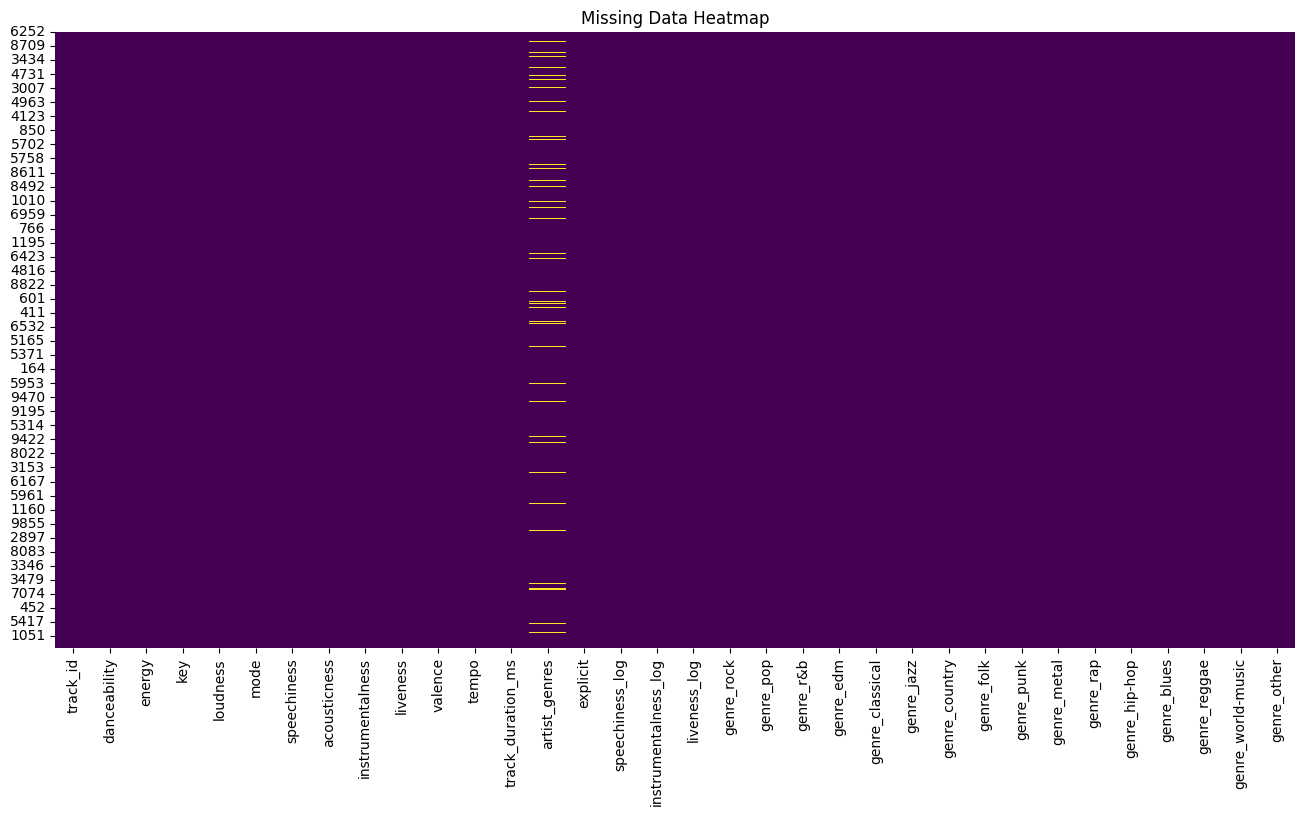

In [14]:
# Create a heatmap of missing values
plt.figure(figsize=(16,8))
sns.heatmap(df_sample.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

### Drop rows missing genre data

In [14]:
# Drop rows where artist_genres is missing
df_sample = df_sample.dropna(subset=['artist_genres'])

In [15]:
df_sample = df_sample[['track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo', 'track_duration_ms',
       'artist_genres', 'explicit', 'speechiness_log', 'instrumentalness_log',
       'liveness_log', 'genre_rock', 'genre_pop', 'genre_r&b', 'genre_edm', 'genre_classical',
       'genre_jazz', 'genre_country', 'genre_folk', 'genre_punk', 'genre_metal',
       'genre_rap', 'genre_hip-hop', 'genre_blues', 'genre_reggae',
       'genre_world-music', 'genre_other']]

### Visualize
As part of our exploratory data analysis, we visualized some of our variables to understand their relationships and correlation. We visualized a correlation matrix, the average danceability by genre, and the tempo distribution by genre.

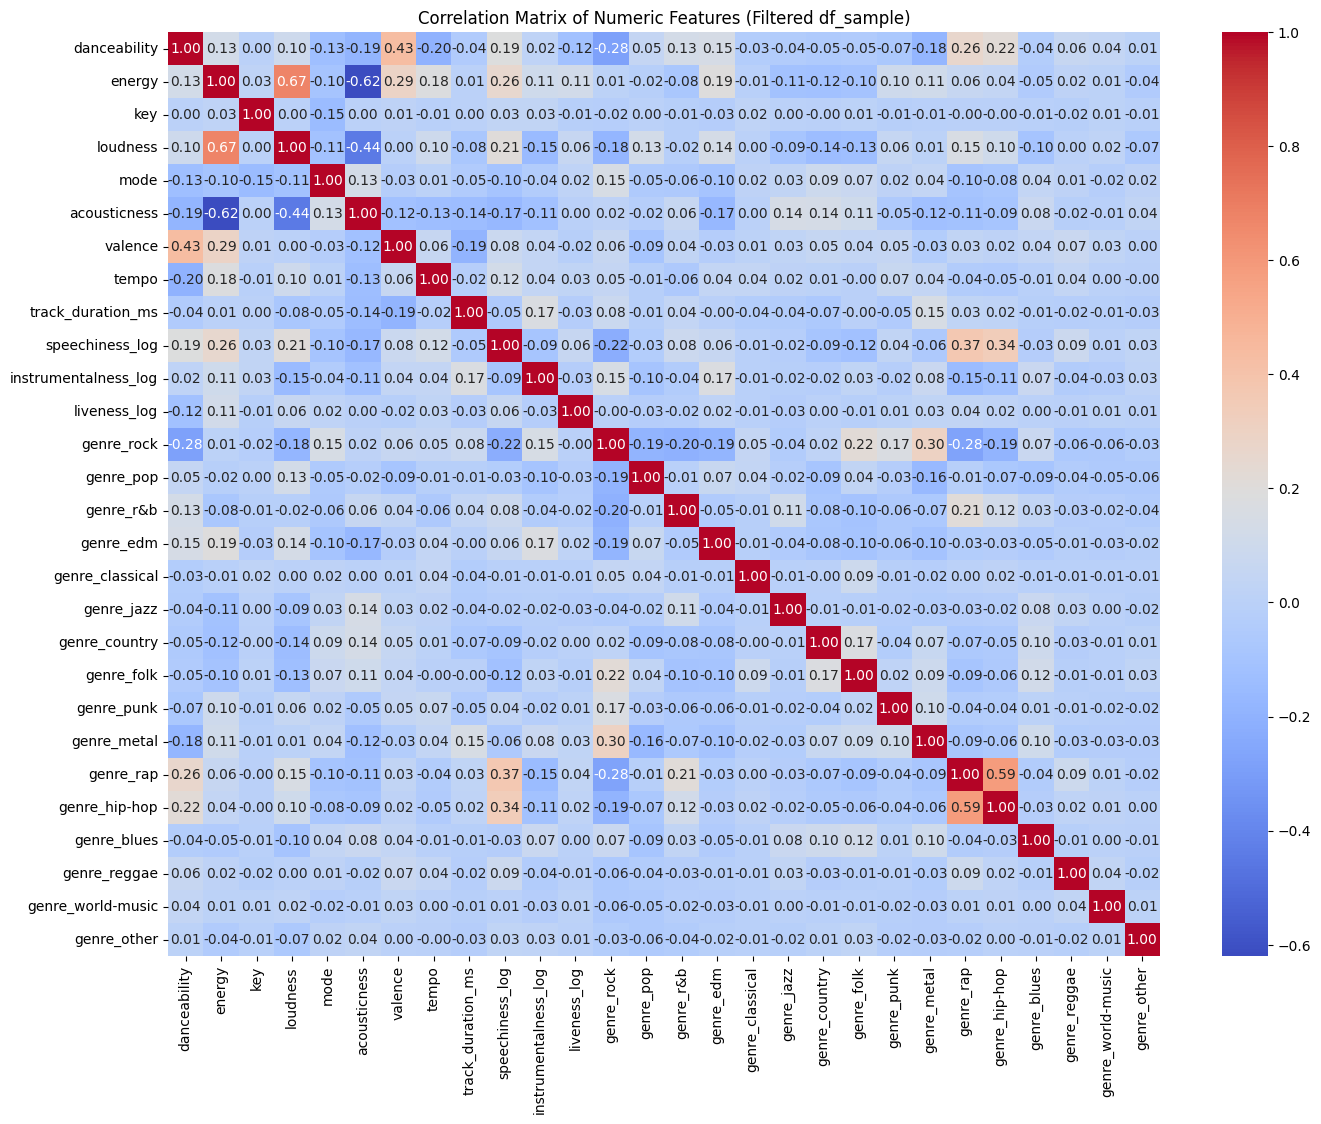

In [16]:
# Select numeric columns only
numeric_cols = df_sample.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr_matrix = df_sample[numeric_cols].corr()

# Display heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Features (Filtered df_sample)")
plt.show()

Some of the most noticable correlative relationships include the negative correlation between acousticness and energy, the high correlation between loudness and energy, the correlation between rap/hip-hop and danceability, the correlation between rap and hip-hop, and the relationship between speechiness and both rap and hip-hop.

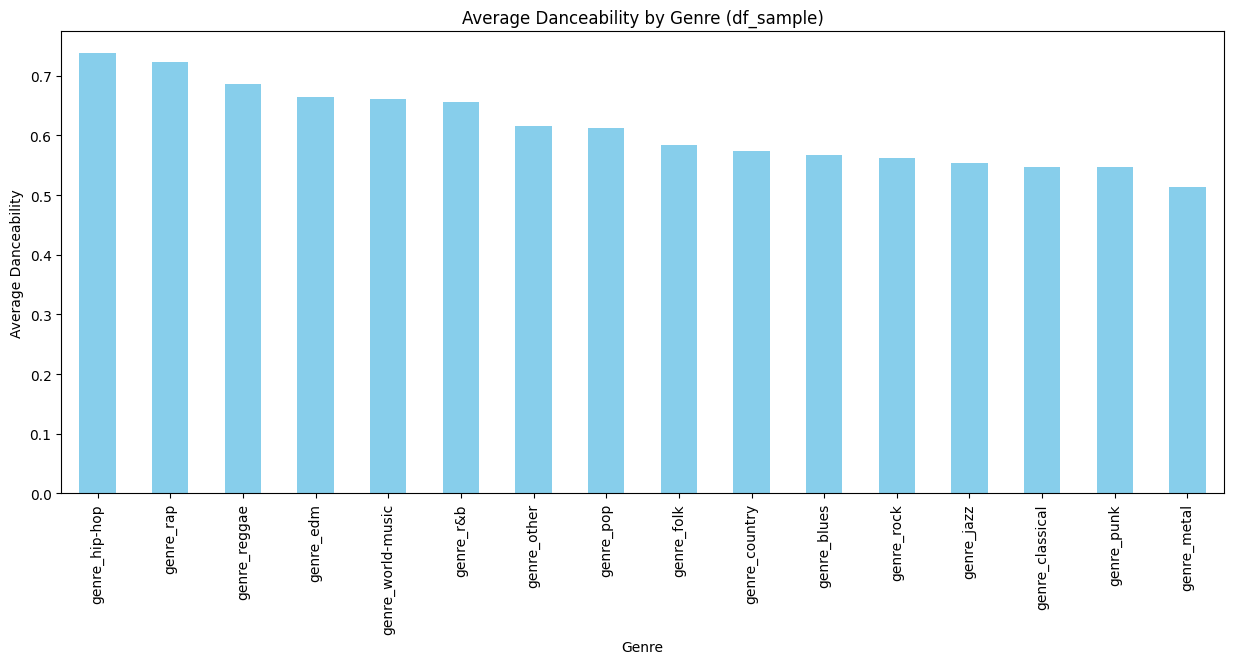

In [17]:
# List of genre dummy columns
genre_cols = [
    'genre_rock', 'genre_pop', 'genre_r&b', 'genre_edm', 'genre_classical',
    'genre_jazz', 'genre_country', 'genre_folk', 'genre_punk', 'genre_metal',
    'genre_rap', 'genre_hip-hop', 'genre_blues', 'genre_reggae',
    'genre_world-music', 'genre_other'
]

# Compute mean danceability per genre
genre_means = {}
for genre in genre_cols:
    genre_means[genre] = df_sample.loc[df_sample[genre] == 1, 'danceability'].mean()

# Convert to a DataFrame
genre_means = pd.DataFrame.from_dict(genre_means, orient='index', columns=['danceability'])

# Sort by danceability
genre_means = genre_means.sort_values('danceability', ascending=False)

# Plot
genre_means.plot(kind='bar', figsize=(15,6), legend=False, color='skyblue')
plt.title('Average Danceability by Genre (df_sample)')
plt.ylabel('Average Danceability')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.show()

C:\Users\benja\AppData\Local\Temp\ipykernel_10644\4050839403.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x='genre', y='tempo', palette='coolwarm')


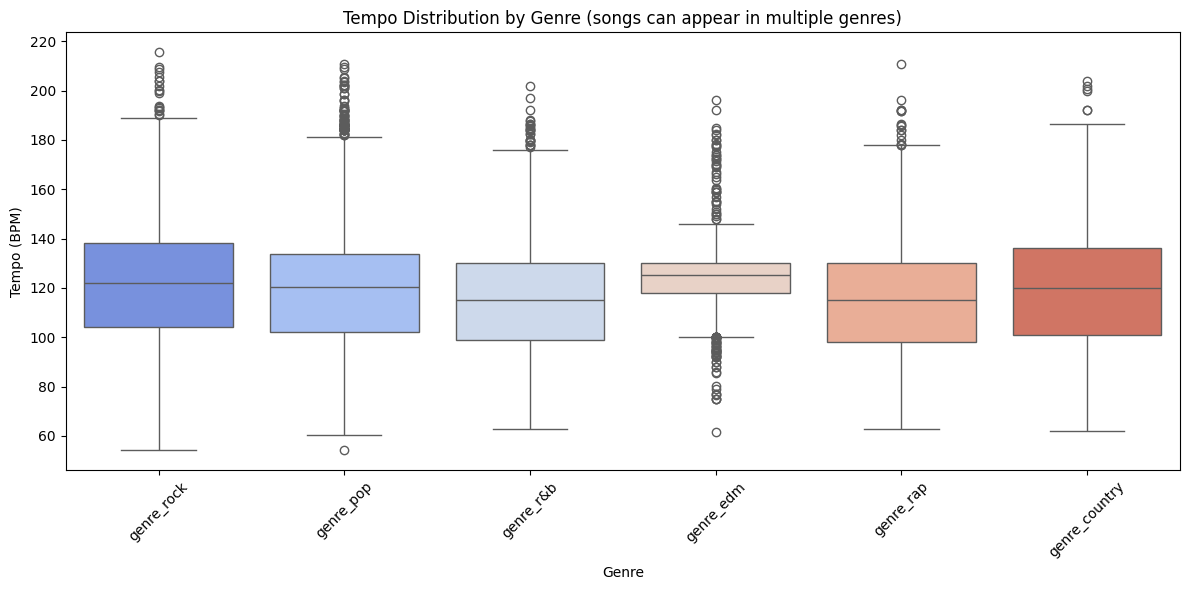

In [19]:
genre_cols = ['genre_rock', 'genre_pop', 'genre_r&b', 'genre_edm', 'genre_rap', 'genre_country']

# Melt the one-hot columns into long format
df_long = df_sample.melt(
    id_vars=['tempo'],       # keeping tempo
    value_vars=genre_cols,   # and keeping the one-hot genre columns
    var_name='genre',
    value_name='is_genre'
)

# Keep only rows where the song has that genre
df_long = df_long[df_long['is_genre'] == 1]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_long, x='genre', y='tempo', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Tempo Distribution by Genre (songs can appear in multiple genres)")
plt.xlabel("Genre")
plt.ylabel("Tempo (BPM)")
plt.tight_layout()
plt.show()

### Feature engineering: 'explicit'

As one final step of feature engineering, we one-hot encoded 'explicit' and visualized the makeup of songs with explicit versus non-explicit content.

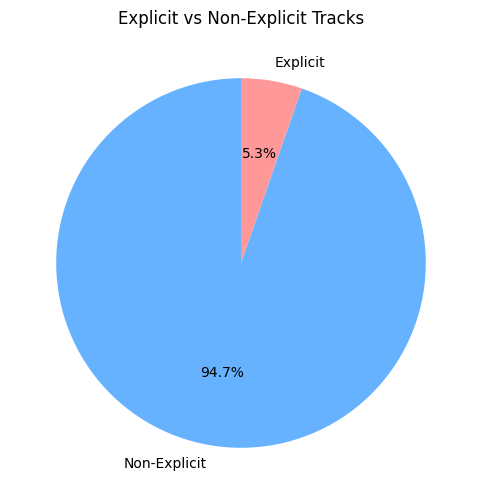

In [18]:
# If explicit is boolean True/False
df_sample['explicit'] = df_sample['explicit'].astype(int)

explicit_counts = df_sample['explicit'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    explicit_counts, 
    labels=['Non-Explicit', 'Explicit'],  # 0 -> Non-Explicit, 1 -> Explicit
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66B2FF','#FF9999']
)
plt.title("Explicit vs Non-Explicit Tracks")
plt.show()

### Final touches to clean the data

Lastly, we dropped artist_genres, and renamed some problematic genre columns to avoid special characters like '&' and '-'.

In [19]:
df_sample = df_sample.drop(columns=['artist_genres'])

In [20]:
# Rename problematic genre columns to avoid special characters
df_sample = df_sample.rename(columns={
    'genre_r&b': 'genre_rnb',
    'genre_hip-hop': 'genre_hiphop',
    'genre_world-music': 'genre_world_music'
})

## (2) Validating Assumptions

### Validity

The cleaned dataset appears valid for the goal of predicting danceability. All available key predictors (energy, key, loudness, mode, acousticness, valence, tempo, track duration, speechiness, instrumentalness, liveness, and genre) are present, and missing values have been addressed by removal. Scatterplots and correlation checks (below) confirm that predictors have meaningful relationships with the outcome of danceability. I don't think there are any obvious missing variables that would change the model. Data generated after the most recent update of this dataset (October 2024) is not included. We took a random sample of 5000 from the dataset of 10000 observations for the sake of reducing model runtime. The genre columns are derived from the artist genre.

There are variables, like album name, song name, song genre, and song popularity, that we do not have included in the sample dataset. Album name and song name would be so granular that we would have thousands of dimensions. Unfortunately, we don't have data on song genre. Lastly, popularity was a variable we dropped in order to keep bias out of the dataset. At the time the Spotify API is scraped, the popularity scores reflect current popularity. So, the dataset sample popularity reflects song popularity at the time of October 2024.

### Representativeness

The data was collected from Spotify's API of the top 10,000 songs between 1950 and October 2024. The selection of songs is representative of top songs by Billboard and the Australian Recording Industry Association within that time period. The data itself is representative of the songs through Spotify's song measurements.

We dropped a few observations that were missing the artist genre field at random.

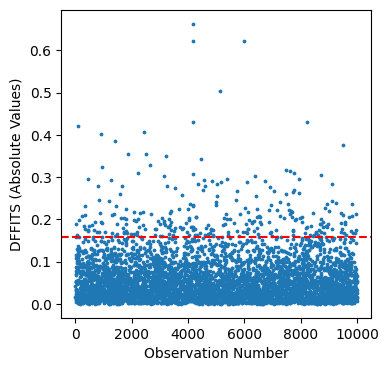

In [21]:
import statsmodels.formula.api as smf

# Drop missing rows for all predictor columns (with 'genre_' prefix)
df_sample = df_sample.dropna(subset=[
    'danceability','energy','key','loudness','mode','acousticness',
    'valence','tempo','track_duration_ms','explicit','speechiness_log',
    'instrumentalness_log','liveness_log',
    'genre_rock','genre_pop','genre_rnb','genre_edm','genre_classical',
    'genre_jazz','genre_country','genre_folk','genre_punk','genre_metal',
    'genre_rap','genre_hiphop','genre_blues','genre_reggae',
    'genre_world_music','genre_other'
])

# Define formula string explicitly
formula = (
    'danceability ~ energy + key + loudness + mode + acousticness + valence + '
    'tempo + track_duration_ms + explicit + speechiness_log + instrumentalness_log + '
    'liveness_log + genre_rock + genre_pop + genre_rnb + genre_edm + genre_classical + '
    'genre_jazz + genre_country + genre_folk + genre_punk + genre_metal + '
    'genre_rap + genre_hiphop + genre_blues + genre_reggae + genre_world_music + genre_other'
)

# Fit the model
fit = smf.ols(formula, data=df_sample).fit()

# Compute DFFITS
df_sample['dffits'] = fit.get_influence().dffits[0]

# Plot absolute DFFITS vs. observation number
threshold = 2 * np.sqrt(len(fit.params) / len(df_sample))  # For n > 30
plt.figure(figsize=(4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(df_sample.index, np.abs(df_sample['dffits']), s=3)
plt.axhline(y=threshold, color='r', linestyle='dashed')
plt.show()

The DFFITS plot illustrates the absolute influence of each observation on the regression model's fitted values for predicting song danceability based on audio features and genre indicators. DFFITS quantifies how much the model's predictions would change if a specific observation were removed. So, a high absolute value signals and influential point (potential outlier or high-leverage observation) that disproportionately impacts the overall fit.

A small number of points exceed the threshold, with values ranging up to ~0.6. They appear sporadic, but overall the model seems reasonably stable. To investigate further, let's focus on extracting and examining these high outlier points where abs(dffits) > threshold, sorting descending by DFFITS.

### Investigate influential points

In [22]:
outliers_dffits = df_sample[np.abs(df_sample['dffits']) > 2 * np.sqrt(len(fit.params) / len(df_sample))]
outliers_dffits_sorted = outliers_dffits.sort_values(by = 'dffits', ascending = False)
outliers_dffits_sorted.head()

track_id  danceability  energy  key  \
5146  spotify:track:794O0j1i57zgUMC7BCBMqY         0.821   0.707  1.0   
8209  spotify:track:6LnjelBSl5xYpdfhfFTJbX         0.846   0.721  2.0   
1411  spotify:track:19cxRMqCzpYNU4wXcMj8jA         0.929   0.301  6.0   
9496  spotify:track:32z32gEn14FHJJ2lZP4xLS         0.830   0.228  1.0   
1882  spotify:track:3zBhihYUHBmGd2bcQIobrF         0.768   0.367  2.0   

      loudness  mode  acousticness  valence    tempo  track_duration_ms  \
5146   -17.299   1.0         0.488   0.2260  107.030             134066   
8209    -5.248   1.0         0.163   0.6380  121.417             203253   
1411   -10.877   0.0         0.804   0.6180  119.963             176386   
9496   -14.219   1.0         0.627   0.0613  107.862             185213   
1882   -11.226   1.0         0.683   0.5320  103.621             163755   

      explicit  speechiness_log  instrumentalness_log  liveness_log  \
5146         0        -1.309330            -13.815511     -0.621757   
8209         0        -3.007785            -13.815511     -1.639897   
1411         0        -2.905873            -13.815511     -2.448768   
9496         0        -2.535766             -6.270649     -1.890475   
1882         0        -3.457736            -10.876349     -2.513306   

      genre_rock  genre_pop  genre_rnb  genre_edm  genre_classical  \
5146           0          0          0          0                0   
8209           1          1          0          0                0   
1411           0          0          0          0                0   
9496           0          0          0          0                0   
1882           0          0          1          0                0   

      genre_jazz  genre_country  genre_folk  genre_punk  genre_metal  \
5146           0              0           0           0            0   
8209           0              1           1           0            1   
1411           0              0           0           0            0   
9496           0              0           0           0            0   
1882           1              0           0           0            0   

      genre_rap  genre_hiphop  genre_blues  genre_reggae  genre_world_music  \
5146          0             0            0             0                  0   
8209          0             0            1             0                  0   
1411          0             0            0             1                  0   
9496          0             0            0             0                  0   
1882          0             0            1             0                  0   

      genre_other    dffits  
5146            1  0.503390  
8209            0  0.430880  
1411            0  0.385713  
9496            1  0.375004  
1882            0  0.355319

High DFFITS points aren't necessarily "bad" - they might just be unusual or extreme. We are moving forward from this assumption but reporting sensitivity and running the model without changing them.

### Additivity/Linearity

### Plotting predictors

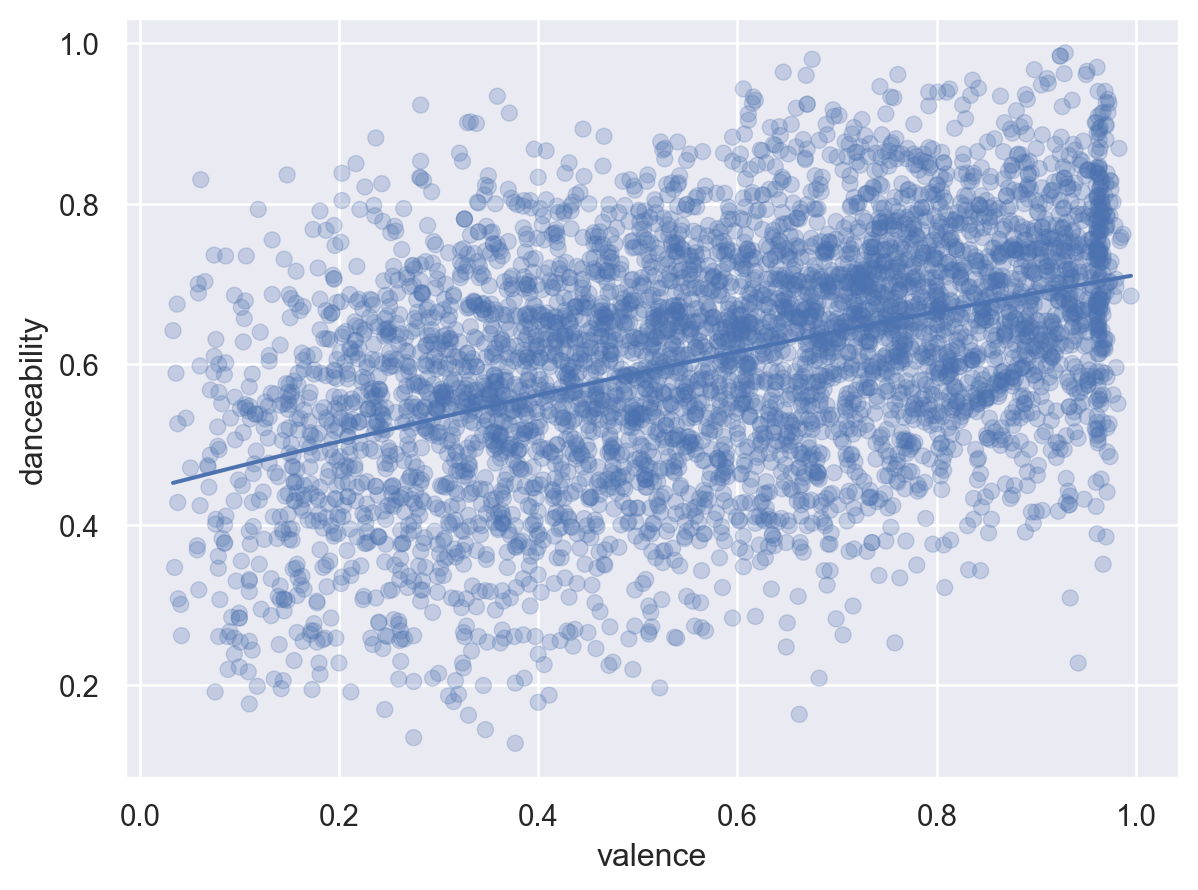

In [23]:
import seaborn.objects as so

# Save the residuals and fitted values
df_sample['residuals'] = fit.resid
df_sample['fittedvalues'] = fit.fittedvalues

(so.Plot(df_sample, x = 'valence', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

Plotting a predictor (valence, in this example) against the outcome (danceability), the points should generally follow a straight line trend, or at least form a random "cloud" of points scattered evenly around that line without any clear systematic patterns that suggest nonlinearity.

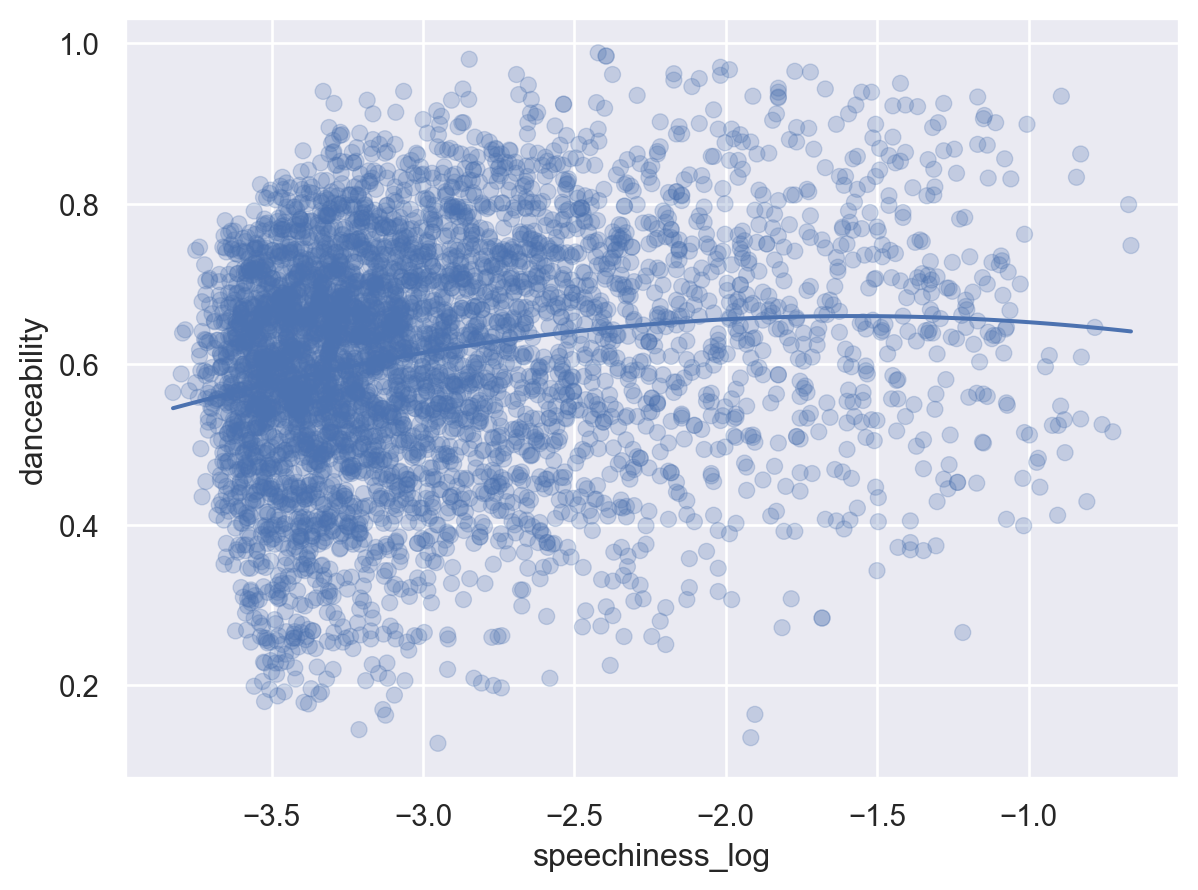

In [24]:
(so.Plot(df_sample, x = 'speechiness_log', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

The spread of points widens as speechiness_log increases, which might hint at heteroscedasticity (non-constant variance) rather than nonlinearity.

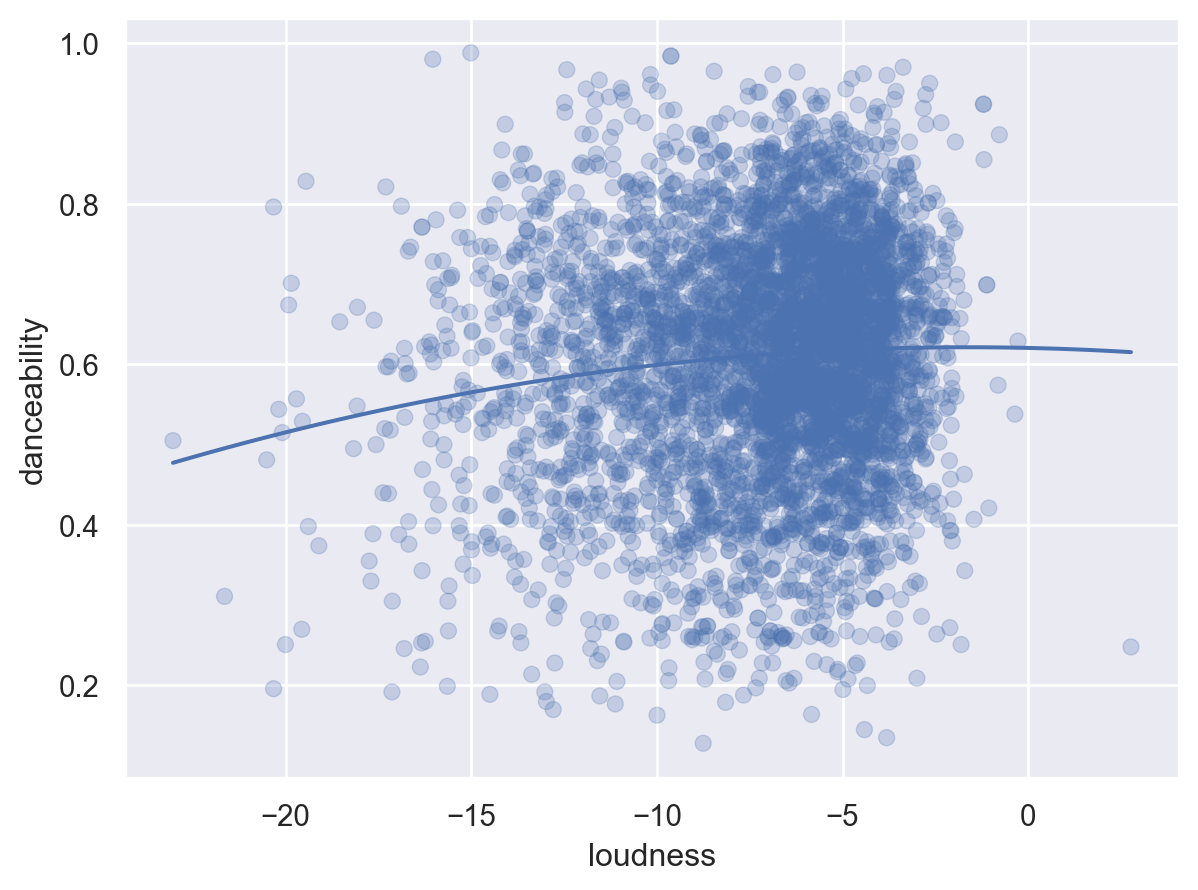

In [26]:
(so.Plot(df_sample, x = 'loudness', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

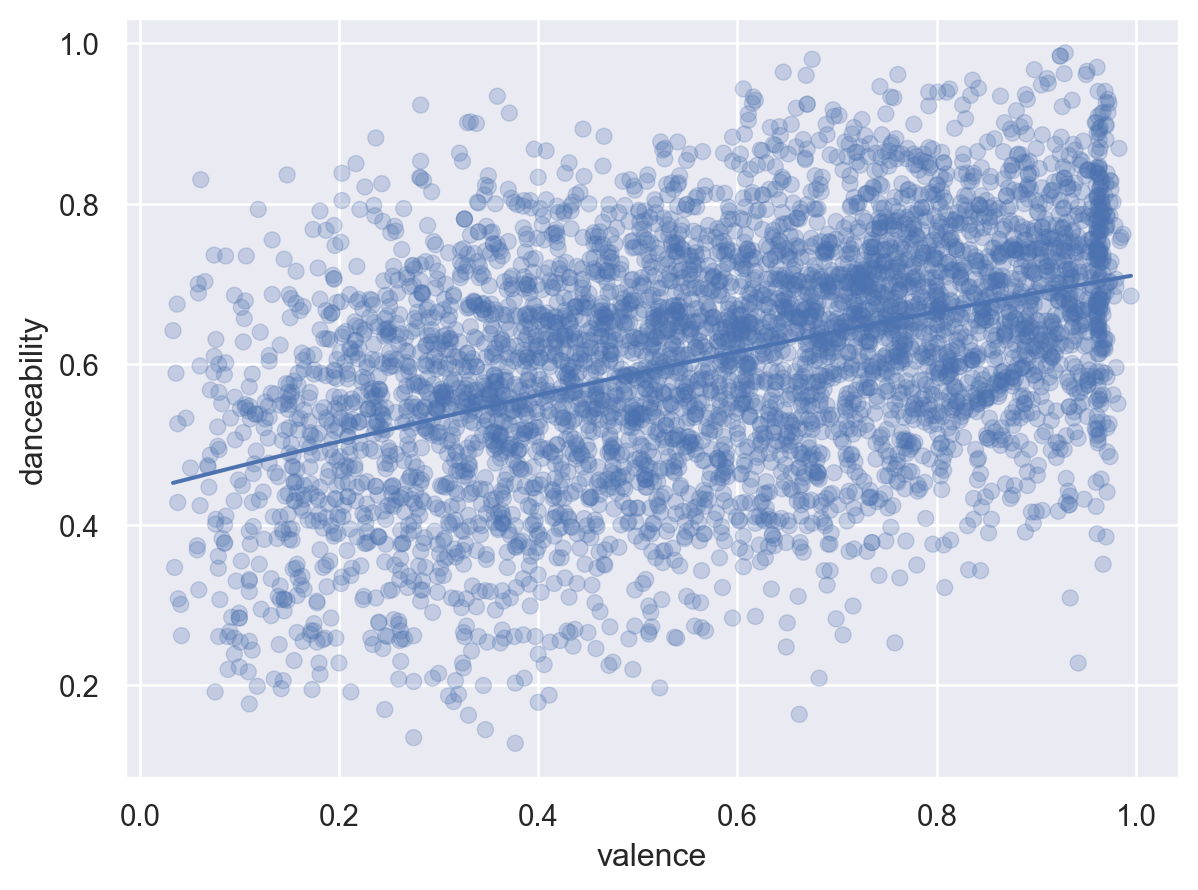

In [27]:
(so.Plot(df_sample, x = 'valence', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

It may be noteworthy that danceability is sensitive to valence. Higher valence (positivity) seems to correlate with higher danceability.

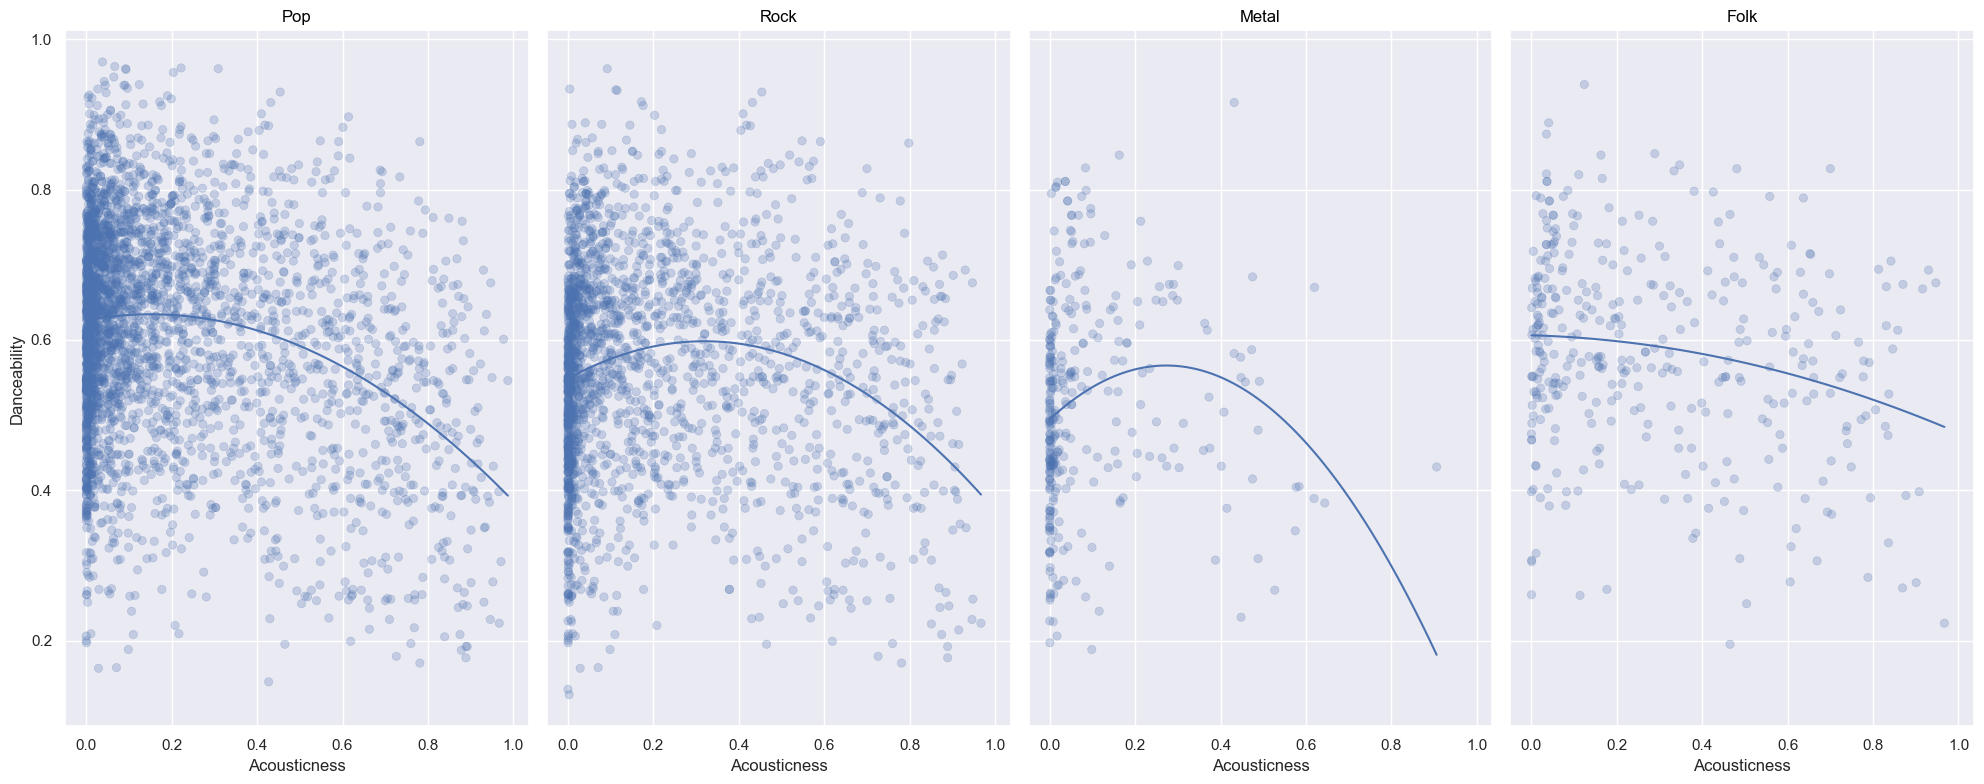

In [58]:
import seaborn.objects as so
import pandas as pd
# Assuming df_sample is defined here or loaded

selected_genres = ['genre_pop', 'genre_rock', 'genre_metal', 'genre_folk']

# Melt the dataframe to long format for the selected genres
df_long = df_sample.melt(
    id_vars=['acousticness', 'danceability'],
    value_vars=selected_genres,
    var_name='genre',
    value_name='is_genre'
)

# Filter to only include rows where the genre is present
df_long = df_long[df_long['is_genre'] == 1]

# Clean up genre names for better display
df_long['genre'] = df_long['genre'].str.replace('genre_', '').str.title()

# 1. Assign the plot object to a variable (e.g., 'p')
p = (
    so.Plot(df_long, x='acousticness', y='danceability')
    .facet(col='genre')  # Facet by genre in columns (side by side), each graph for one genre
    .add(so.Dot(alpha=0.25))
    .add(so.Line(), so.PolyFit())
    .label(
        x='Acousticness',
        y='Danceability',
    )
    .layout(size=(20, 8))
)

p.save('faceted_genre_plot.png')
p.show()

The overall trend across the four genres seen here is a parabolic relationship where as acousticness increases from zero, danceability tends to decrease. Pop tracks have higher danceability in general. Metal tracks have the sharpest decline as instrumentalness moves beyond a peak, suggesting that purely acoustic metal tracks are significantly less danceable than acoustic tracks in other genres.

### Plotting residuals

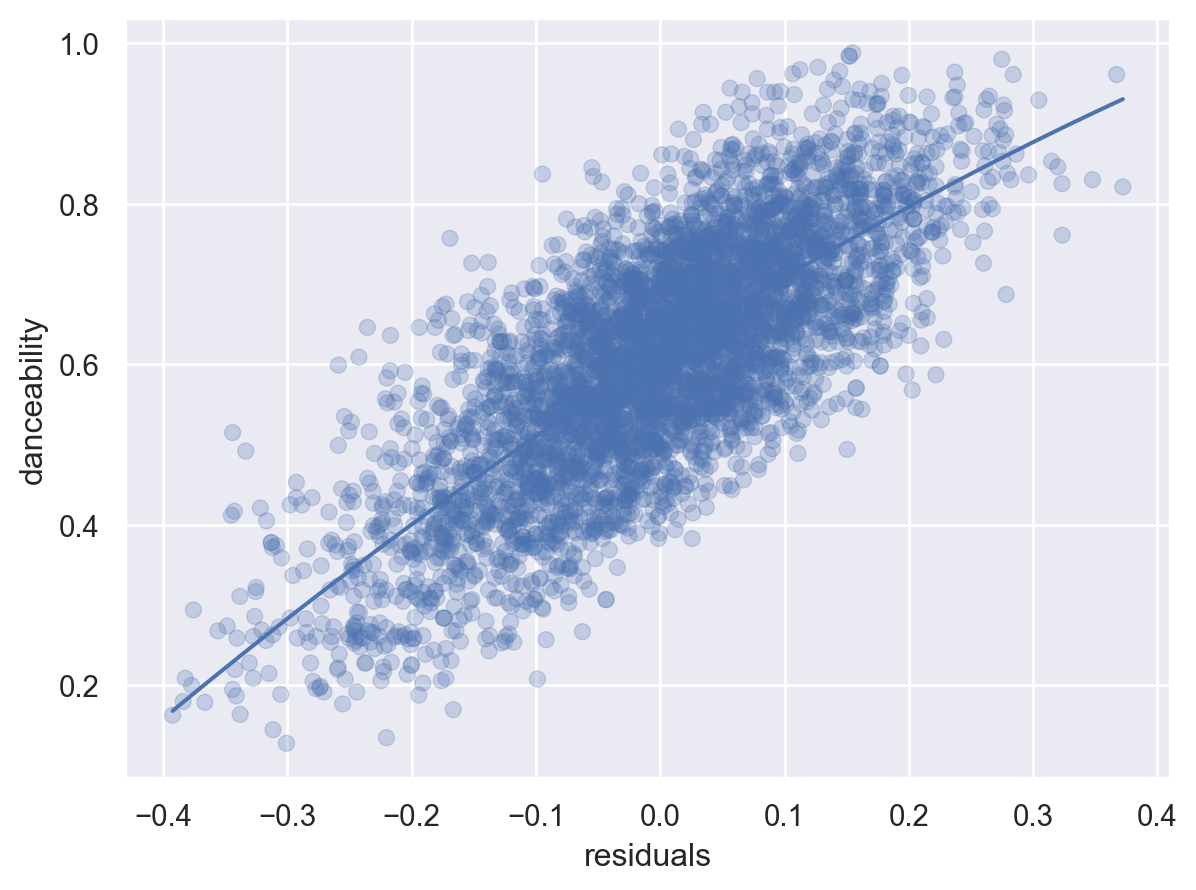

In [27]:
(so.Plot(df_sample, x = 'residuals', y = 'danceability')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

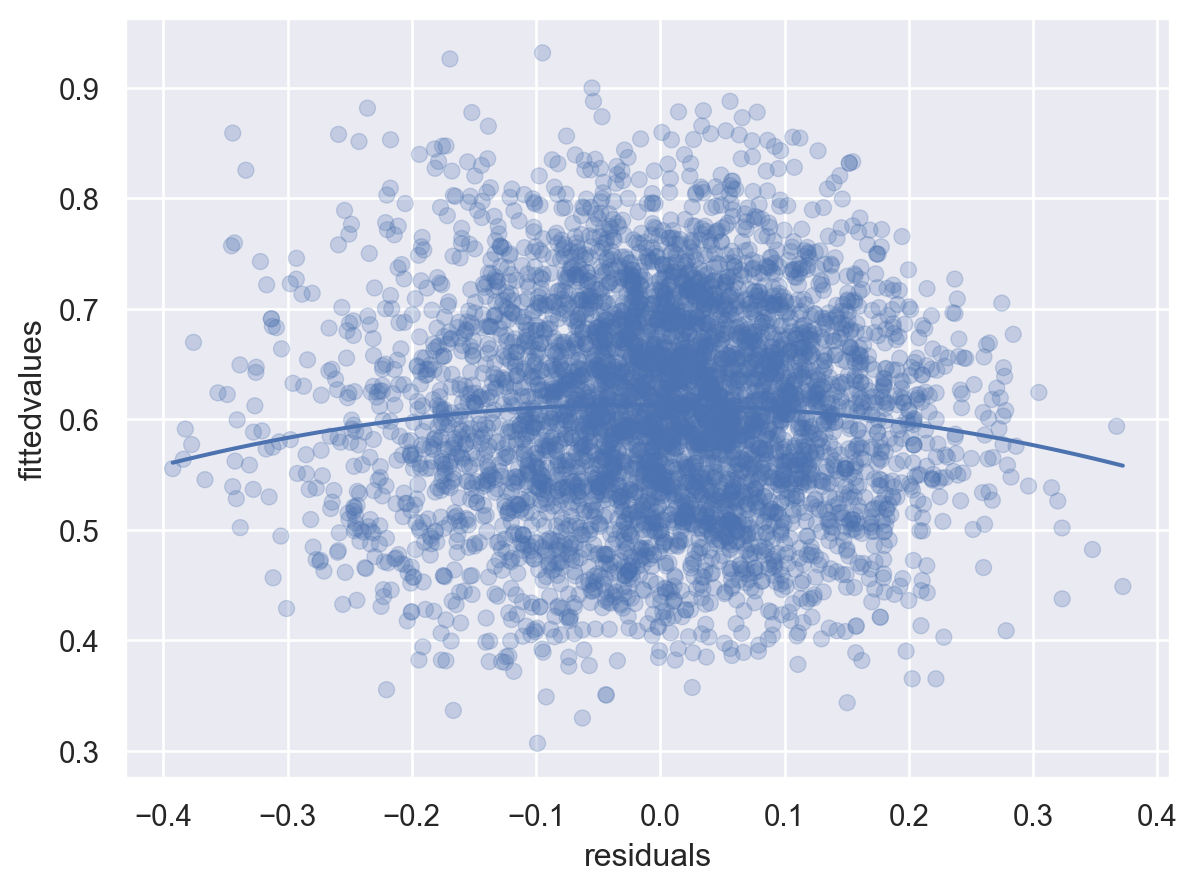

In [28]:
(so.Plot(df_sample, x = 'residuals', y = 'fittedvalues')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

The relationship between our residuals and y is roughly linear with a positive slope, and the points form a dense cloud around the line without any obvious non-linear patterns like curves. 

### Partial regression plots

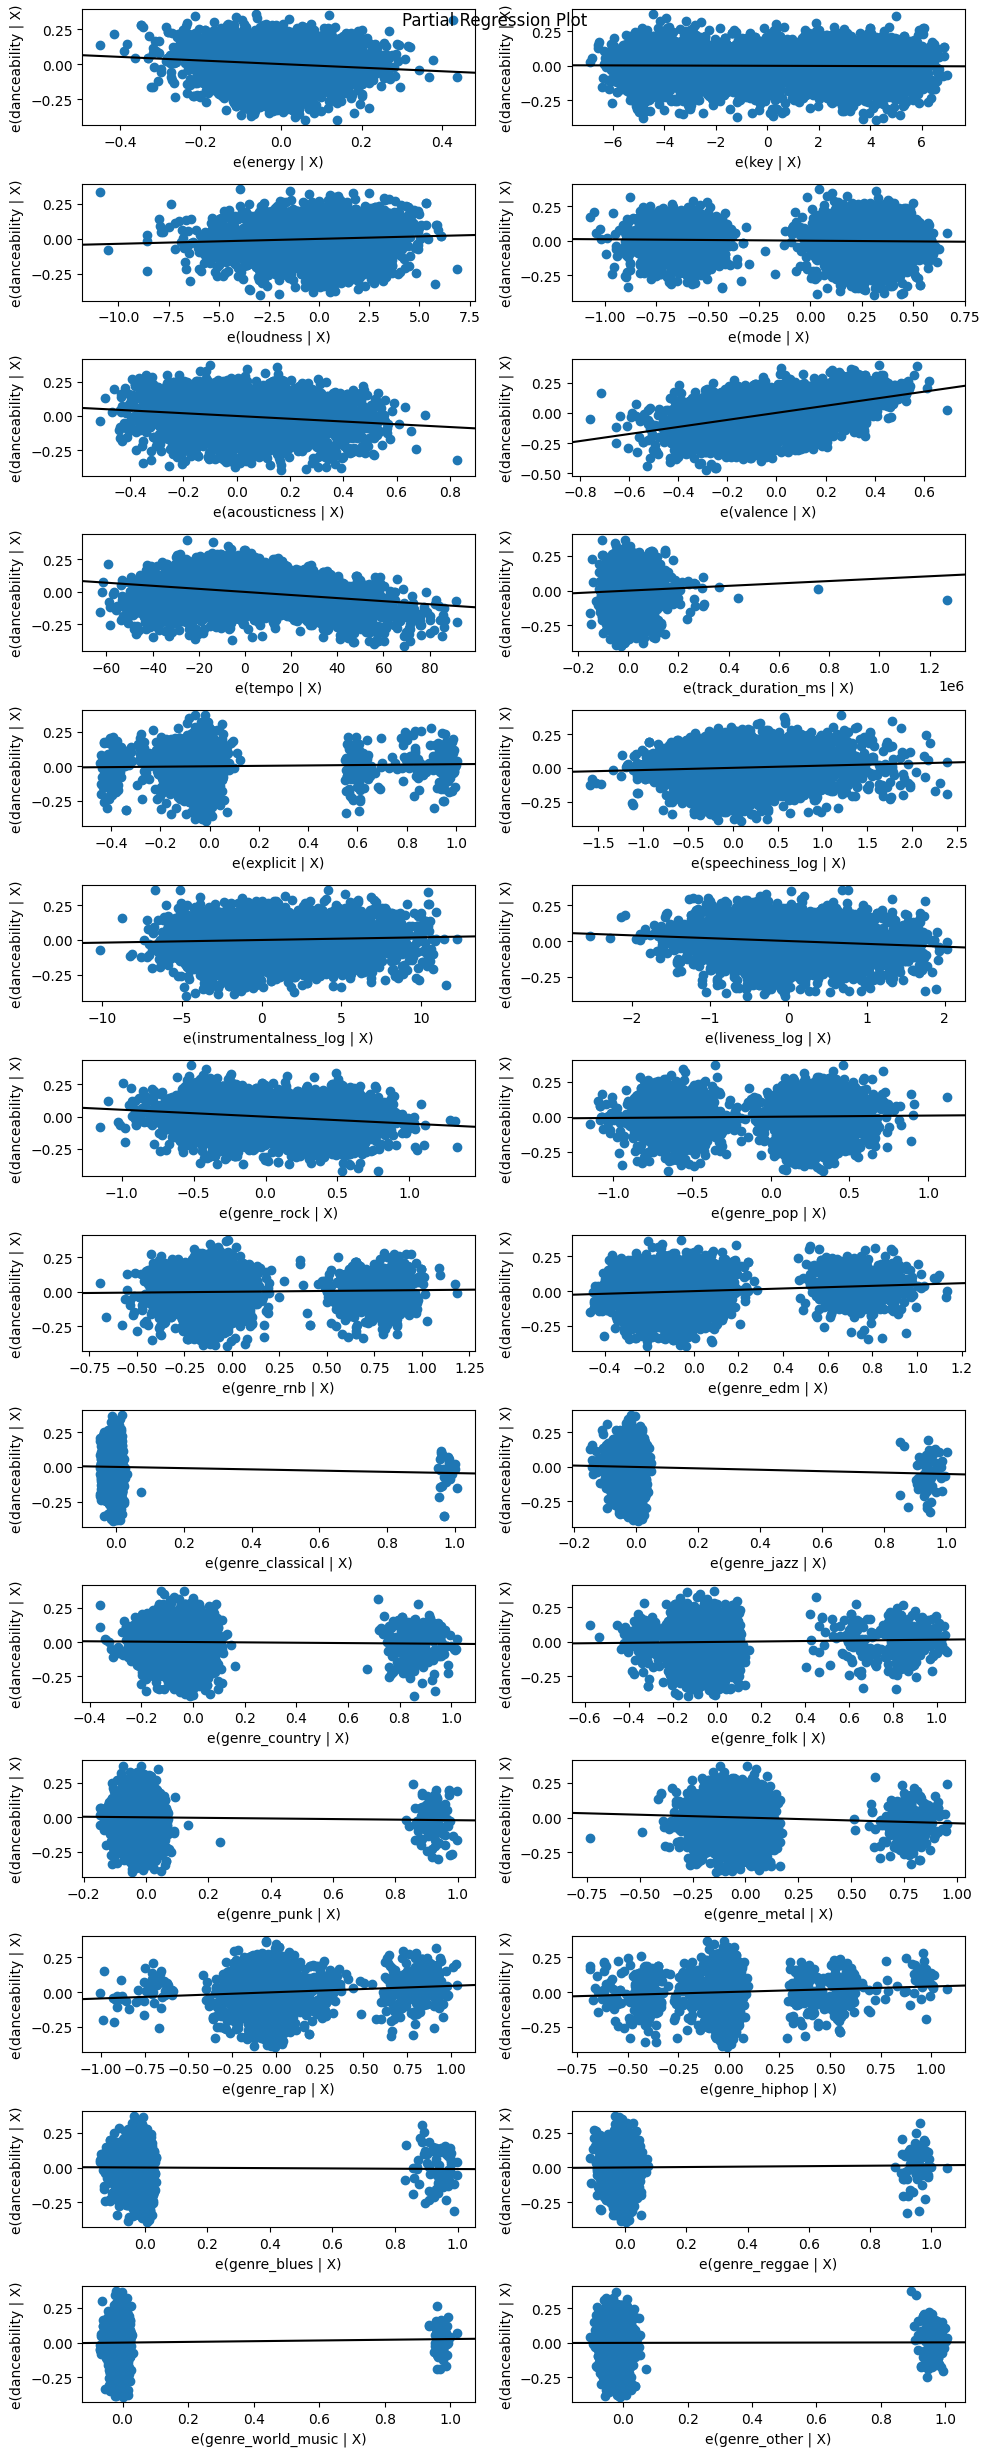

In [29]:
import statsmodels.api as sm

# Corrected predictors list with 'genre_' prefix
predictors = [
    'energy', 'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo', 
    'track_duration_ms', 'explicit', 'speechiness_log', 'instrumentalness_log', 
    'liveness_log', 'genre_rock', 'genre_pop', 'genre_rnb', 'genre_edm', 
    'genre_classical', 'genre_jazz', 'genre_country', 'genre_folk', 
    'genre_punk', 'genre_metal', 'genre_rap', 'genre_hiphop', 'genre_blues', 
    'genre_reggae', 'genre_world_music', 'genre_other'
]

fig = plt.figure(figsize=(10,25))
sm.graphics.plot_partregress_grid(
    fit, 
    exog_idx=list(predictors), 
    fig=fig
)
fig.tight_layout()
plt.show()

The partial regression plots look sufficiently linear and cloud-like (especially since we've already imposed a log-transformation on our heavily right-skewed data).

### Independence

The data is a random sample of n = 5000 from our larger dataset. Each observation is unique. Observations should be independent of each other and identically distributed (coming from the same process of gathering data).

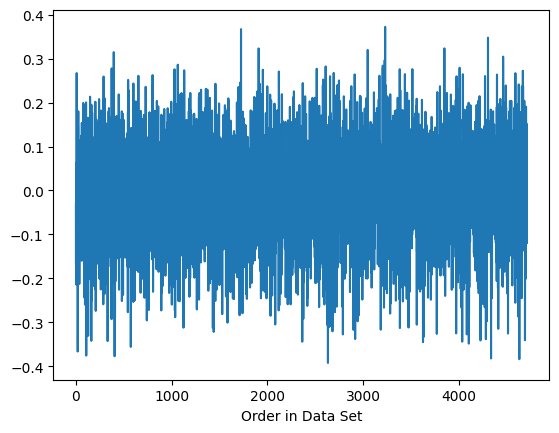

In [30]:
x_values = range(1, len(df_sample) + 1)
plt.plot(x_values, df_sample['residuals'], linestyle='-')
plt.xlabel("Order in Data Set")
plt.show()

There doesn't appear to be a trend in the sequential plot.

### Constant Variance

Constant variance is diagnosable with a scatterplot of residuals and fitted values.

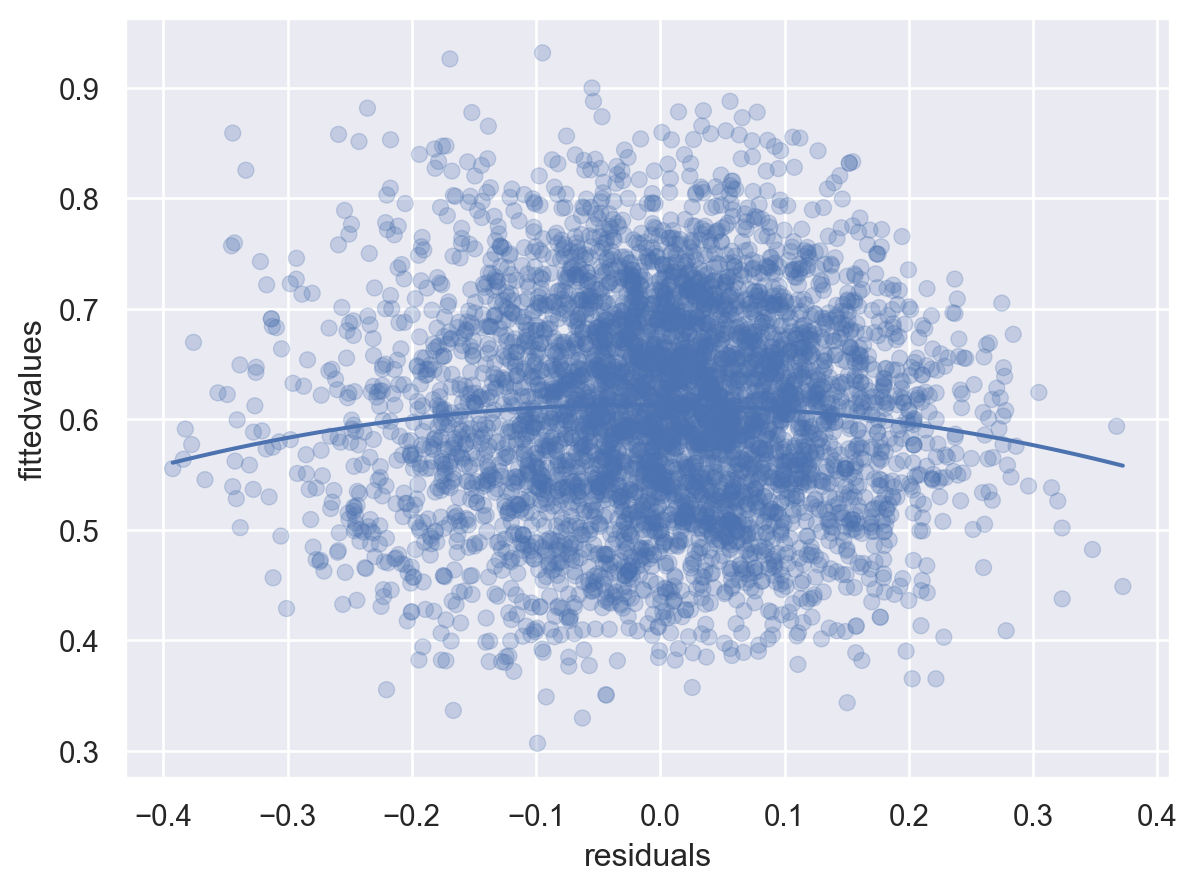

In [31]:
(so.Plot(df_sample, x = 'residuals', y = 'fittedvalues')
    .add(so.Dot(alpha = 0.25))
    .add(so.Line(), so.PolyFit())
)

If there is constant variance (homoscedasticity), we should see constant variance in the residuals (no funnel shape). We have a cloud-like shape and a roughly linear line, so our variance is constant.

### Normality

This assumption is that the variation, or error, is normally distributed. We can plot the residuals and use a Q-Q plot to diagnose error normality. A histogram should show that the residuals are roughly normal, and a Q-Q plot should show that the model's residuals follow a roughly diagonal line.

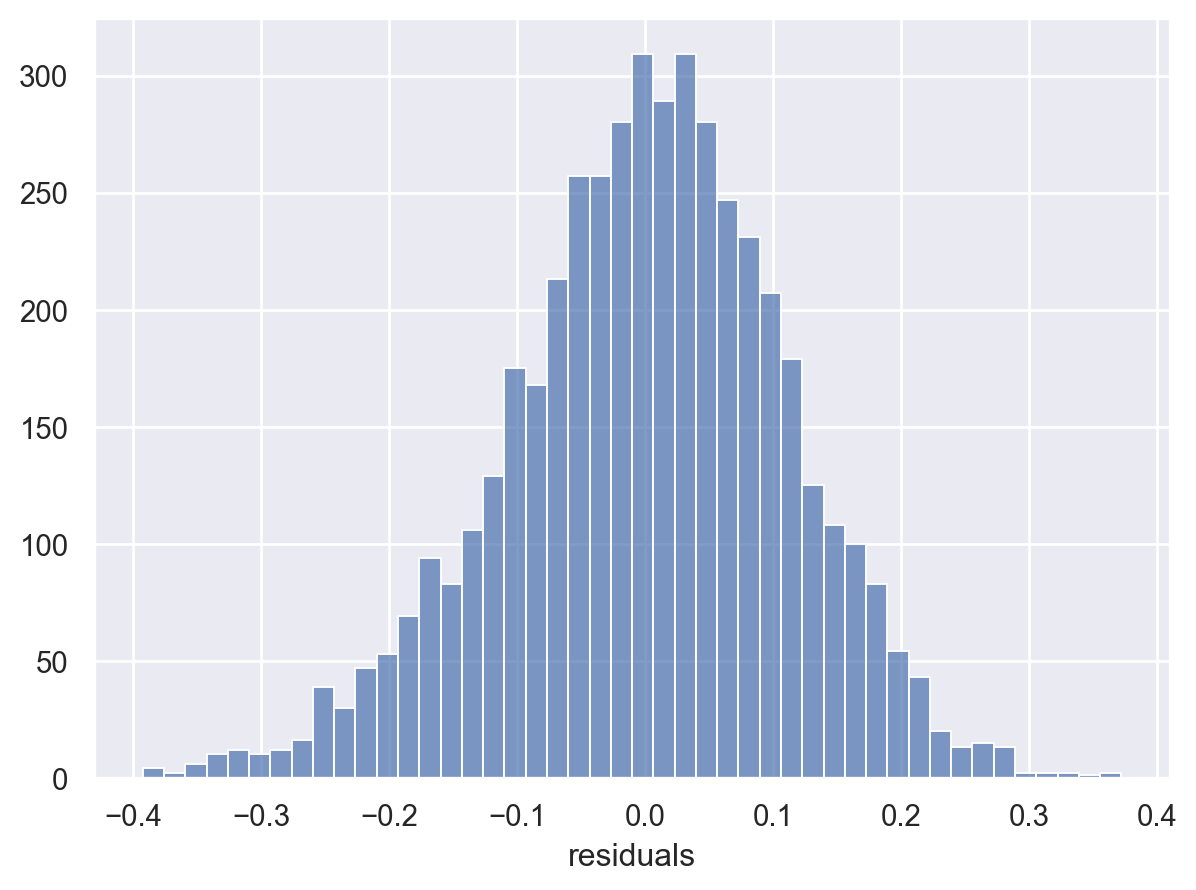

In [32]:
(so.Plot(df_sample, x = 'residuals')
  .add(so.Bars(), so.Hist())
)

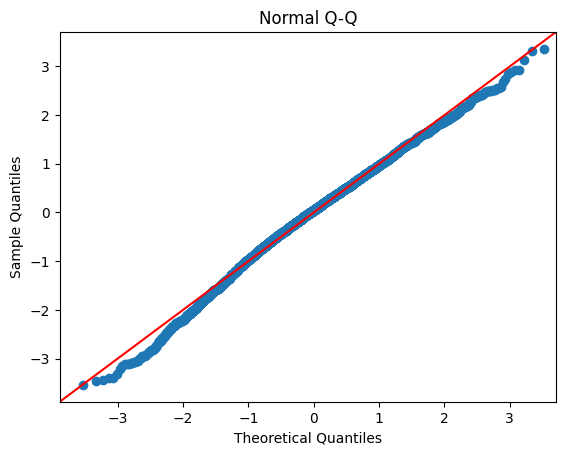

In [33]:
sm.qqplot(
  df_sample['residuals'], 
  line = '45', 
  fit = True
)
plt.title("Normal Q-Q")
plt.show()

The quantile-quantile plot shows that the variation or error is roughly normally distributed.

### Identifiability / Multicollinearity

We want to avoid using multiple predictors that have high multicollinearity because it creates a problem for model interpretability - making it difficult to disentangle the individual effects of highly correlated predictors.

We can use Variance Inflation Factor (VIF) as an indicator of problematic variables.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import polars as pl

X_train = df_sample[predictors]

vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)

vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (28, 2)
┌──────────────────────┬───────────┐
│ predictors           ┆ vif       │
│ ---                  ┆ ---       │
│ str                  ┆ f64       │
╞══════════════════════╪═══════════╡
│ energy               ┆ 27.771744 │
│ key                  ┆ 3.197915  │
│ loudness             ┆ 11.140206 │
│ mode                 ┆ 3.568098  │
│ acousticness         ┆ 2.690523  │
│ valence              ┆ 9.060841  │
│ tempo                ┆ 20.872545 │
│ track_duration_ms    ┆ 18.233404 │
│ explicit             ┆ 1.256801  │
│ speechiness_log      ┆ 25.224472 │
│ instrumentalness_log ┆ 7.777899  │
│ liveness_log         ┆ 8.409873  │
│ genre_rock           ┆ 2.649957  │
│ genre_pop            ┆ 3.787744  │
│ genre_rnb            ┆ 1.30688   │
│ genre_edm            ┆ 1.333219  │
│ genre_classical      ┆ 1.025803  │
│ genre_jazz           ┆ 1.063466  │
│ genre_country        ┆ 1.155819  │
│ genre_folk           ┆ 1.230321  │
│ genre_punk           ┆ 1.087739  │
│ genre_metal          

The key metrics that stand out as being significantly high are energy, speechiness_log, tempo, track_duration_ms, and loudness.

Based on the correlation matrix we observed earlier, we can see energy and loudness are strongly correlated (0.67). Acousticness and energy are negatively correlated (-0.62). Valence and danceability are negatively correlated (-0.43). And acousticness and loudness are negatively correlated (-0.44).

We'll drop energy, and also combine rap and hiphop into rap_hiphop and see the new VIFs.

In [35]:
# Combine rap and hiphop into a new binary variable (1 if either is 1)
df_sample['genre_rap_hiphop'] = ((df_sample['genre_rap'] == 1) | (df_sample['genre_hiphop'] == 1)).astype(int)

# Updated predictors list for VIF (matches the new formula, excluding intercept)
predictors = [
    'key', 'loudness', 'mode', 'acousticness', 'valence', 'tempo',
    'track_duration_ms', 'explicit', 'speechiness_log', 'instrumentalness_log',
    'liveness_log', 'genre_rock', 'genre_pop', 'genre_rnb', 'genre_edm',
    'genre_classical', 'genre_jazz', 'genre_country', 'genre_folk',
    'genre_punk', 'genre_metal', 'genre_rap_hiphop', 'genre_blues',
    'genre_reggae', 'genre_world_music', 'genre_other'
]

X_train = df_sample[predictors]  # Simplified selection

# Compute VIF
vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)

# Create DataFrame
vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (26, 2)
┌──────────────────────┬───────────┐
│ predictors           ┆ vif       │
│ ---                  ┆ ---       │
│ str                  ┆ f64       │
╞══════════════════════╪═══════════╡
│ key                  ┆ 3.128189  │
│ loudness             ┆ 8.686179  │
│ mode                 ┆ 3.530218  │
│ acousticness         ┆ 2.476567  │
│ valence              ┆ 6.823965  │
│ tempo                ┆ 17.307936 │
│ track_duration_ms    ┆ 16.081028 │
│ explicit             ┆ 1.216566  │
│ speechiness_log      ┆ 23.727246 │
│ instrumentalness_log ┆ 7.705084  │
│ liveness_log         ┆ 8.399437  │
│ genre_rock           ┆ 2.634684  │
│ genre_pop            ┆ 3.762073  │
│ genre_rnb            ┆ 1.302365  │
│ genre_edm            ┆ 1.282332  │
│ genre_classical      ┆ 1.024409  │
│ genre_jazz           ┆ 1.061867  │
│ genre_country        ┆ 1.155111  │
│ genre_folk           ┆ 1.22541   │
│ genre_punk           ┆ 1.084799  │
│ genre_metal          ┆ 1.28019   │
│ genre_rap_hiphop     

The updated VIF table after dropping energy and combining rap/hiphop shows some improvements, but multicollinearity remains problematic for speechiness_log, track_duration_ms, and tempo. Others like liveness_log, instrumentalness_log, loudness, and valence are also a bit higher than 1 but closer to acceptable (<10).

Let's create another correlation matrix with the problematic fields and a few others as references.

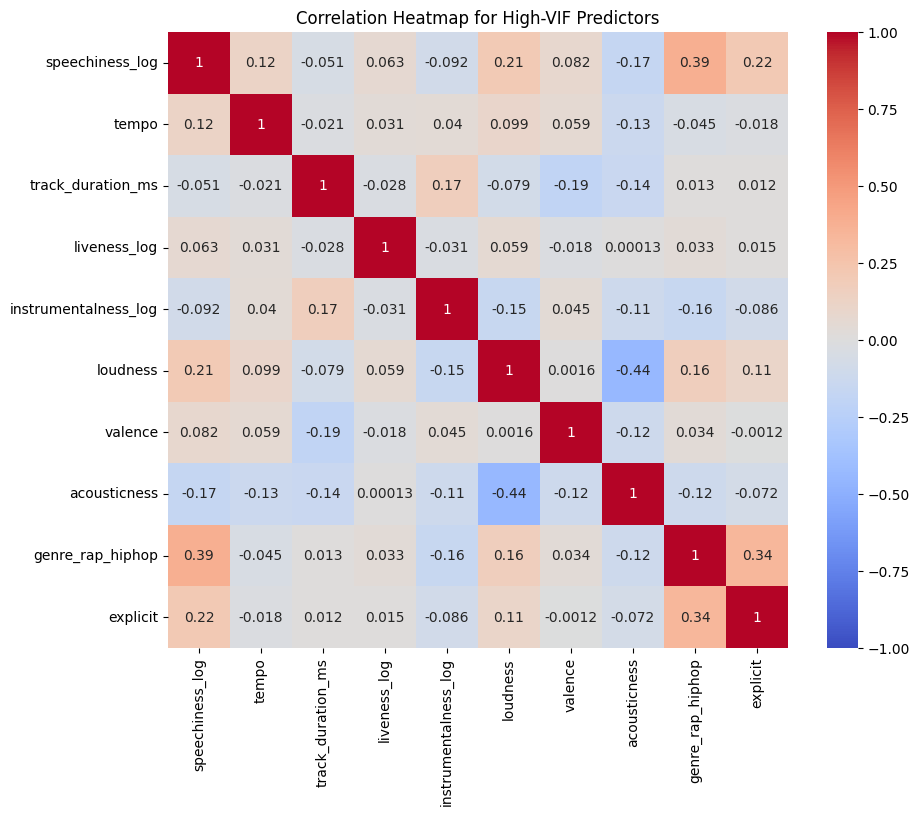

In [36]:
# Select high-VIF suspects and a few others for context
high_vif_vars = [
    'speechiness_log', 'tempo', 'track_duration_ms', 'liveness_log', 
    'instrumentalness_log', 'loudness', 'valence', 'acousticness', 
    'genre_rap_hiphop', 'explicit'
]
corr_matrix = df_sample[high_vif_vars].corr()

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for High-VIF Predictors')
plt.show()

The heatmap doesn't reveal obvious priorities. The next highest correlation is between rap_hiphop and speechiness_log, which makes intuitive sense. We dropped speechiness_log in hopes of VIFs that meet our assumptions. After dropping just speechiness_log, the outcome was still a VIF of 14+ for track_duration_ms and 16+ for tempo. We removed track_duration_ms and tempo and see the outcome.

In [37]:
# Updated predictors list for VIF (drop speechiness_log and track_duration_ms)
predictors = [
    'key', 'loudness', 'mode', 'acousticness', 'valence',
    'explicit', 'instrumentalness_log',
    'liveness_log', 'genre_rock', 'genre_pop', 'genre_rnb', 'genre_edm',
    'genre_classical', 'genre_jazz', 'genre_country', 'genre_folk',
    'genre_punk', 'genre_metal', 'genre_rap_hiphop', 'genre_blues',
    'genre_reggae', 'genre_world_music', 'genre_other'
]

X_train = df_sample[predictors]  # Simplified selection

# Compute VIF
vif = np.zeros(len(X_train.columns))
for i in range(len(X_train.columns)):
    vif[i] = variance_inflation_factor(X_train.values, i)  # Use .values to avoid index issues

# Create DataFrame
vif_df = pl.DataFrame({
    'predictors': predictors,
    'vif': vif
})

with pl.Config(tbl_rows=30):
    print(vif_df)

shape: (23, 2)
┌──────────────────────┬──────────┐
│ predictors           ┆ vif      │
│ ---                  ┆ ---      │
│ str                  ┆ f64      │
╞══════════════════════╪══════════╡
│ key                  ┆ 2.973298 │
│ loudness             ┆ 7.274944 │
│ mode                 ┆ 3.361263 │
│ acousticness         ┆ 2.382068 │
│ valence              ┆ 6.092538 │
│ explicit             ┆ 1.210581 │
│ instrumentalness_log ┆ 6.608862 │
│ liveness_log         ┆ 7.279648 │
│ genre_rock           ┆ 2.512129 │
│ genre_pop            ┆ 3.439737 │
│ genre_rnb            ┆ 1.291229 │
│ genre_edm            ┆ 1.219427 │
│ genre_classical      ┆ 1.020948 │
│ genre_jazz           ┆ 1.059366 │
│ genre_country        ┆ 1.149065 │
│ genre_folk           ┆ 1.223024 │
│ genre_punk           ┆ 1.076895 │
│ genre_metal          ┆ 1.244405 │
│ genre_rap_hiphop     ┆ 1.467731 │
│ genre_blues          ┆ 1.071586 │
│ genre_reggae         ┆ 1.051804 │
│ genre_world_music    ┆ 1.024929 │
│ genre_other

Our average VIF is now ~2.52, which isn't much more than one. Our highest VIF is ~7.3, which is less than 10. We feel good about this assumption. We can consider adding back either tempo or track_duration_ms if we think those are valuable metrics in further analysis beyond this model.

## (3) Training and Testing Split

### Feature Engineering

Below we will preprocess the data for the benefit of the model in order to avoid overfitting and underfitting. We'll split the data into training and testing sets, transform any data that needs to be transformed to address assumption violations, and dummy code discrete predictors.

In [38]:
import statsmodels.formula.api as smf

# First, let's drop the dffits fields and rap and hiphop in favor of rap_hiphop
df_sample = df_sample.drop(
    columns=["genre_rap", "genre_hiphop", "dffits", "residuals", "fittedvalues"]
)

In [39]:
from sklearn.model_selection import train_test_split

# Drop outcome + non-numerics
X = df_sample.drop(columns=['danceability', 'track_id', 'speechiness_log', 'track_duration_ms', 'tempo'], errors='ignore')
y = df_sample['danceability']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We already attempted normalizing danceability during data cleaning, so we are not log transforming it below.

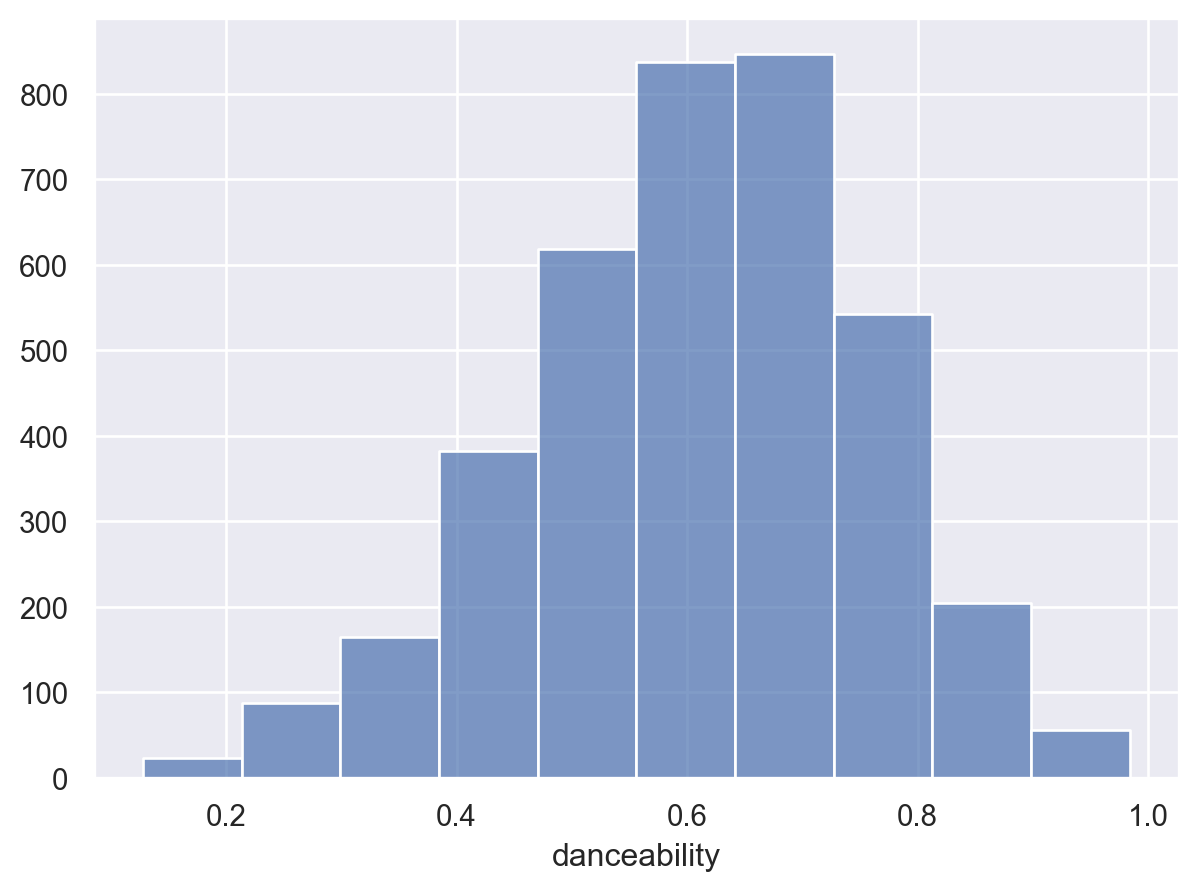

In [40]:
# If y_train is a Series
y_train_pandas = y_train.rename("danceability").to_frame()

# Plot histogram
(
    so.Plot(y_train_pandas, x="danceability")
    .add(so.Bars(), so.Hist(bins=10))
)

The danceability training sample follows the same distribution as the full sample.

We have also already one-hot encoded our dummy variables, so in the following cell we will drop one genre as a reference.

In [41]:
# Drop the 'classical' column as a reference for genre
X_train = X_train.drop(columns=["genre_classical"])

# Create combined training DataFrame for formula API
data_train = X_train.copy()
data_train['danceability'] = y_train

# Define predictors (all columns except the outcome)
predictors = list(X_train.columns)

## (4) Ordinary Least Squares

Ordinary Least Squares (OLS) is a type of maximum likelihood estimation (MLE) that minimizes the sum of squared residuals and maximizes the likelhiood function. It is a frequentist method. OLS outputs point estimates (single numbers that represent our best guess of each parameter).

In [42]:
# Fit the model using formula API (automatically includes intercept)
fit_04 = smf.ols('danceability ~ ' + ' + '.join(predictors), data=data_train).fit()
fit_04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           danceability   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     100.1
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        23:32:17   Log-Likelihood:                 2797.0
No. Observations:                3764   AIC:                            -5546.
Df Residuals:                    3740   BIC:                            -5396.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5702      0.021     26.969      0.000       0.529       0.612
energy                  -0.1381      0.018     -7.701      0.000      -0.173      -0.103
key                     -0.0002      0.001     -0.362      0.717      -0.001       0.001
loudness                 0.0033      0.001      3.558      0.000       0.001       0.005
mode                    -0.0131      0.004     -3.085      0.002      -0.021      -0.005
acousticness            -0.0927      0.010     -9.119      0.000      -0.113      -0.073
valence                  0.2870      0.009     32.709      0.000       0.270       0.304
explicit                 0.0146      0.009      1.635      0.102      -0.003       0.032
instrumentalness_log     0.0017      0.001      3.333      0.001       0.001       0.003
liveness_log            -0.0210      0.003     -7.665      0.000      -0.026      -0.016
genre_rock              -0.0570      0.005    -12.338      0.000      -0.066      -0.048
genre_pop                0.0085      0.004      1.919      0.055      -0.000       0.017
genre_rnb                0.0121      0.006      2.041      0.041       0.000       0.024
genre_edm                0.0460      0.006      7.523      0.000       0.034       0.058
genre_jazz              -0.0633      0.017     -3.725      0.000      -0.097      -0.030
genre_country           -0.0190      0.009     -2.079      0.038      -0.037      -0.001
genre_folk               0.0127      0.007      1.730      0.084      -0.002       0.027
genre_punk              -0.0265      0.012     -2.210      0.027      -0.050      -0.003
genre_metal             -0.0376      0.008     -4.712      0.000      -0.053      -0.022
genre_blues             -0.0090      0.015     -0.604      0.546      -0.038       0.020
genre_reggae            -0.0090      0.017     -0.530      0.596      -0.042       0.024
genre_world_music        0.0298      0.016      1.817      0.069      -0.002       0.062
genre_other              0.0150      0.014      1.087      0.277      -0.012       0.042
genre_rap_hiphop         0.0831      0.007     12.085      0.000       0.070       0.097
==============================================================================
Omnibus:                       49.243   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.417
Skew:                          -0.267   Prob(JB):                     6.84e-12
Kurtosis:                       3.206   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting Parameter Estimates

Looking at the output of the table, we can interpret the confidence interval estimates as follows:


- **const**: When all predictors are at 0, the intercept parameter estimate says we can expect, with 95% confidence, a danceability of about 0.529 to 0.612 with the genre classical, no explicitness present, and energy, key, loudness, mode, acousticness, and valence of 0. This parameter estimate is statistically significant.
- **energy**: A one-unit increase in energy decreases danceability by, with 95% confidence, about -0.173 to -0.103, holding all other variables fixed. This parameter estimate is statistically significant.
- **key**: A one-unit increase in key changes danceability by, with 95% confidence, about −0.001 to 0.001, holding all other variables fixed. This parameter estimate is not statistically significant.
- **loudness**: A one-unit increase in loudness increases danceability by, with 95% confidence, about 0.001 to 0.005, holding all other variables fixed. This parameter estimate is statistically significant.
- **mode**: Having major mode (compared to minor) decreases danceability by, with 95% confidence, about −0.021 to −0.005, holding all other variables fixed. This parameter estimate is statistically significant.
- **acousticness**: A one-unit increase in acousticness decreases danceability by, with 95% confidence, about −0.113 to −0.073, holding all other variables fixed. This parameter estimate is statistically significant.
- **valence**: A one-unit increase in valence increases danceability by, with 95% confidence, about 0.270 to 0.304, holding all other variables fixed. This parameter estimate is statistically significant.
- **explicit**: Explicit tracks change danceability by, with 95% confidence, about −0.003 to 0.032 compared to non-explicit tracks, holding all other variables fixed. This parameter estimate is not statistically significant.
- **instrumentalness_log**: A 1% increase in instrumentalness increases danceability by, with 95% confidence, about 0.00001 to 0.00003, holding all other variables fixed. This parameter estimate is statistically significant.
- **liveness_log**: A 1% increase in liveness decreases danceability by, with 95% confidence, about −0.00026 to −0.00016, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_rock**: Rock songs decrease danceability by, with 95% confidence, about −0.066 to −0.048 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_pop**: Pop songs change danceability by, with 95% confidence, about −0.000 to 0.017 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_rnb**: R&B songs increase danceability by, with 95% confidence, about 0.000 to 0.024 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_edm**: EDM songs increase danceability by, with 95% confidence, about 0.034 to 0.058 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_jazz**: Jazz songs decrease danceability by, with 95% confidence, about −0.097 to −0.030 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_country**: Country songs decrease danceability by, with 95% confidence, about −0.037 to −0.001 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_folk**: Folk songs change danceability by, with 95% confidence, about −0.002 to 0.027 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_punk**: Punk songs decrease danceability by, with 95% confidence, about −0.050 to −0.003 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_metal**: Metal songs decrease danceability by, with 95% confidence, about −0.053 to −0.022 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.
- **genre_blues**: Blues songs change danceability by, with 95% confidence, about −0.038 to 0.020 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_reggae**: Reggae songs change danceability by, with 95% confidence, about −0.042 to 0.024 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_world_music**: World music songs change danceability by, with 95% confidence, about −0.002 to 0.062 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_other**: Other genre songs change danceability by, with 95% confidence, about −0.012 to 0.042 compared to classical, holding all other variables fixed. This parameter estimate is not statistically significant.
- **genre_rap_hiphop**: Rap/Hip-Hop songs increase danceability by, with 95% confidence, about 0.070 to 0.097 compared to classical, holding all other variables fixed. This parameter estimate is statistically significant.

We were unable to determine credible intervals using a Bayesian fit, which would incorporate a prior probability distribution in determining a new posterior distribution to summarize ranges of values that include 95% of the probability.

## (5) Predictive Fit and Decision Theoretic Fit and Interpretation

In [43]:
from sklearn.metrics import mean_squared_error

# Apply same transformations to X_test (drop reference genre)
X_test = X_test.drop(columns=["genre_classical"], errors='ignore')

# Use test data to predict
y_pred = fit_04.predict(X_test)

# Compute MSE
mean_squared_error(y_test, y_pred)

0.013424340976074792

In [44]:
from sklearn.metrics import root_mean_squared_error

# Compute RMSE
root_mean_squared_error(y_test, y_pred)

0.11586345832951299

Our MSE and RMSE explain that, on average, the squared prediction errors are approximately 0.013, and the model's predictions deviate from the actual values of danceability by about 0.116 units. This corresponds to roughly 11.6% error when the danceability (our prediction variable) is normalized between 0 and 1.

Next we will take our objective formalized as a function and experiment with it (using decision theoretic fit).

In [45]:
# Construct new design matrix for prediction
X_new = pd.DataFrame({
    "const": [1, 1, 1, 1],
    "energy": [0.6, 0.8, 0.7, 0.5],
    "key": [5, 5, 5, 5],
    "loudness": [-6, -5, -7, -8],
    "mode": [1, 1, 1, 1],
    "acousticness": [0.2, 0.1, 0.15, 0.3],
    "valence": [0.5, 0.7, 0.4, 0.6],
    "explicit": [0, 0, 1, 0],
    "instrumentalness_log": [0.1, 0.05, 0.2, 0.1],
    "liveness_log": [0.2, 0.1, 0.3, 0.2],
    # Genres
    "genre_rock": [1, 0, 0, 0],
    "genre_pop": [0, 0, 1, 0],
    "genre_rnb": [0, 0, 0, 0],
    "genre_edm": [0, 0, 0, 1],
    "genre_jazz": [0, 0, 0, 0],
    "genre_country": [0, 0, 0, 0],
    "genre_folk": [0, 0, 0, 0],
    "genre_punk": [0, 0, 0, 0],
    "genre_metal": [0, 0, 0, 0],
    "genre_blues": [0, 0, 0, 0],
    "genre_reggae": [0, 0, 0, 0],
    "genre_world_music": [0, 0, 0, 0],
    "genre_other": [0, 0, 0, 0],
    "genre_rap_hiphop": [0, 1, 0, 0]
})

# Get predictions with confidence and prediction intervals
preds_summary = fit_04.get_prediction(X_new).summary_frame(alpha=0.05)

# Display the summary frame
print(preds_summary)

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  0.517390  0.010025       0.497736       0.537045      0.290168   
1  0.701856  0.011220       0.679858       0.723854      0.474419   
2  0.554296  0.012786       0.529227       0.579365      0.326542   
3  0.647054  0.011038       0.625413       0.668695      0.419652   

   obs_ci_upper  
0      0.744612  
1      0.929293  
2      0.782050  
3      0.874457  


We created and experimented with a new design matrix for prediction - simulating songs with certain conditions and specific values for variables to see the danceability intervals based on our regression fit.

In [46]:
# Construct a new song for prediction
X_new = pl.DataFrame({
    "const": 1,
    "energy": 0.8,
    "key": 5,
    "loudness": -5,
    "mode": 1,
    "acousticness": 0.1,
    "valence": 0.7,
    "explicit": 0,
    "instrumentalness_log": 0.05,
    "liveness_log": 0.1,
    "genre_rock": 0,
    "genre_pop": 0,
    "genre_rnb": 0,
    "genre_edm": 0,
    "genre_jazz": 0,
    "genre_country": 0,
    "genre_folk": 0,
    "genre_punk": 0,
    "genre_metal": 0,
    "genre_blues": 0,
    "genre_reggae": 0,
    "genre_world_music": 0,
    "genre_other": 0,
    "genre_rap_hiphop": 1
}).to_pandas()

In [47]:
# Get predictions + intervals
y_pred = fit_04.get_prediction(X_new).summary_frame(alpha=0.05)

# Convert to polars for nice column operations if desired
y_pred_pl = pl.from_pandas(y_pred)

# For danceability, no log-transform is needed, but you can rename intervals
y_pred_intervals = (
    y_pred_pl
    .with_columns(
        pl.col('obs_ci_lower').alias('pred_danceability_lower'),
        pl.col('obs_ci_upper').alias('pred_danceability_upper')
    )
    .select('pred_danceability_lower', 'pred_danceability_upper')
)

y_pred_intervals

shape: (1, 2)
┌─────────────────────────┬─────────────────────────┐
│ pred_danceability_lower ┆ pred_danceability_upper │
│ ---                     ┆ ---                     │
│ f64                     ┆ f64                     │
╞═════════════════════════╪═════════════════════════╡
│ 0.474419                ┆ 0.929293                │
└─────────────────────────┴─────────────────────────┘

### Optimization

Instead of informing a business decision to maximize a profit function, we wanted to iterate through possible parameters to find how to optimize danceability.

### Get confidence intervals

In [48]:
# Get confidence and prediction intervals for all the combinations
preds_summary = fit_04.get_prediction(X_new).summary_frame(alpha=0.05)

# Display the table
print(preds_summary)

       mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  0.701856  0.01122       0.679858       0.723854      0.474419      0.929293


The 95% prediction interval for a new song with our features could realistically have danceability anywhere in the range of 0.4744 to 0.9293, reflecting natural variability in the danceability of individual songs in the sample.

## (6) Visualizing Interval Estimates

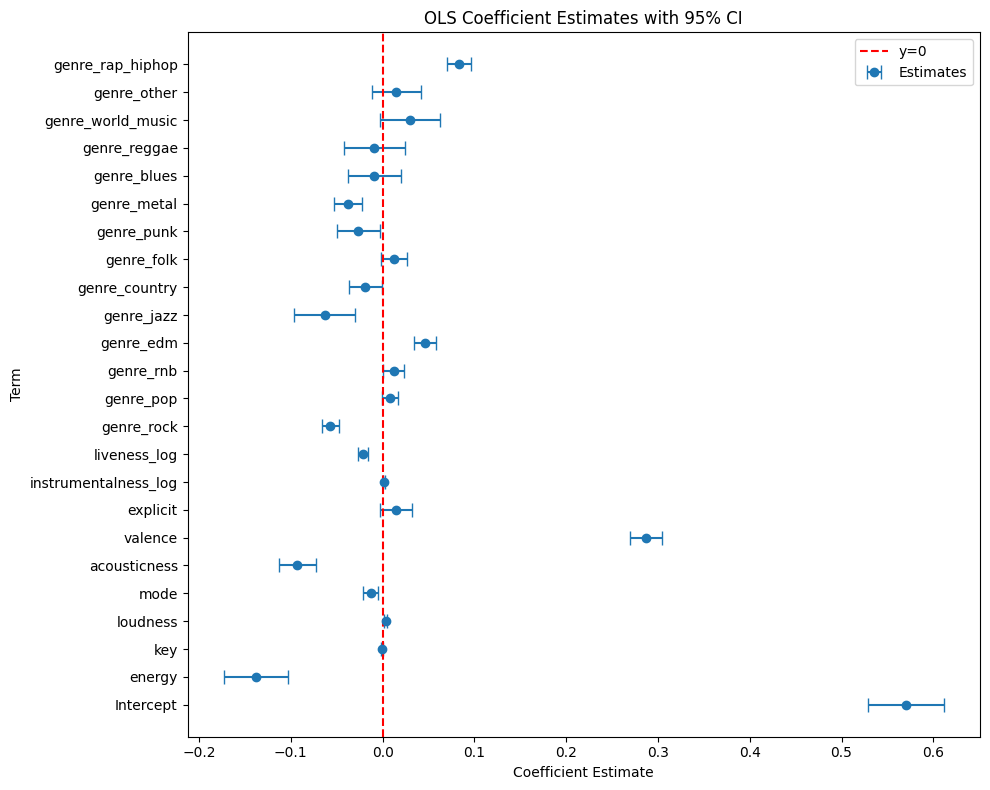

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Construct confidence interval DataFrame for fit_04
df_ci = pd.DataFrame({
    'term': fit_04.params.index.tolist(),
    'coef': fit_04.params.values,
    'conf_low': fit_04.conf_int().iloc[:, 0].values,
    'conf_high': fit_04.conf_int().iloc[:, 1].values
})

# Plot the confidence intervals
plt.figure(figsize=(10, 8))
plt.errorbar(
    df_ci['coef'], 
    df_ci['term'],
    xerr=[df_ci['coef'] - df_ci['conf_low'], df_ci['conf_high'] - df_ci['coef']],
    fmt='o',
    capsize=5,
    label='Estimates'
)
plt.axvline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Term')
plt.title('OLS Coefficient Estimates with 95% CI')
plt.legend()
plt.tight_layout()
plt.show()

Below we remove the interval as a variable included in the visualizations.

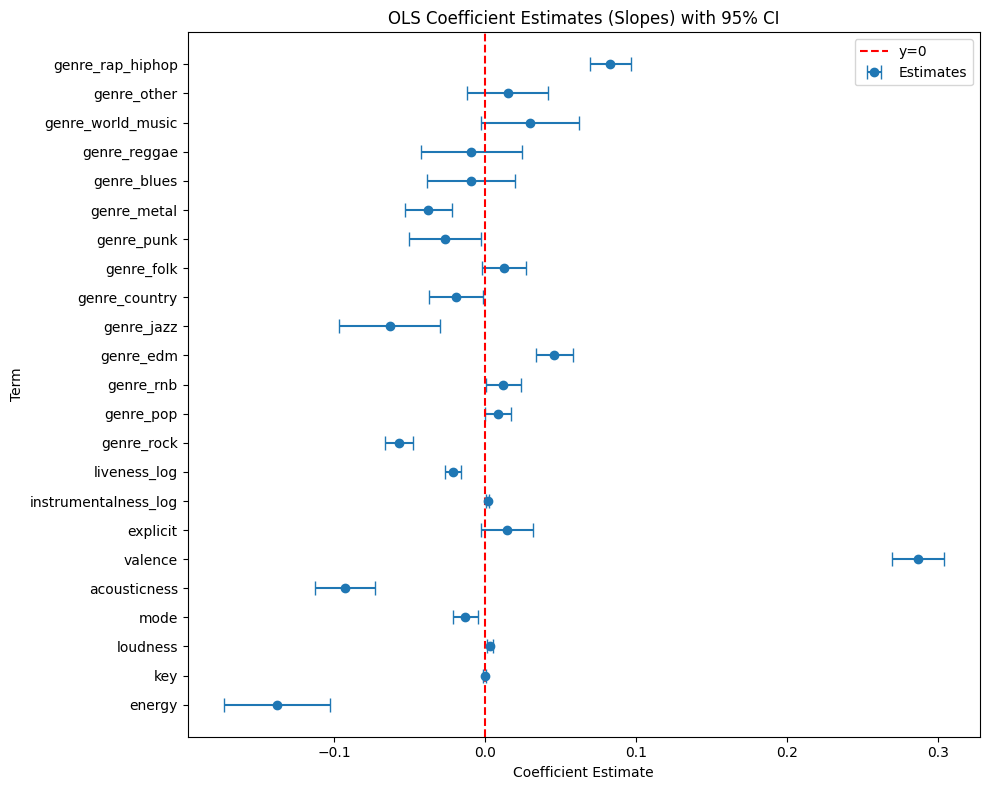

In [56]:
# Selecting just slopes
df_slopes = df_ci[df_ci['term'] != 'Intercept']

# Plotting the confidence interval for slopes
plt.figure(figsize=(10, 8))
plt.errorbar(
    df_slopes['coef'], 
    df_slopes['term'],
    xerr=[df_slopes['coef'] - df_slopes['conf_low'], df_slopes['conf_high'] - df_slopes['coef']], 
    fmt='o', 
    capsize=5,
    label='Estimates'
)
plt.axvline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Term')
plt.title('OLS Coefficient Estimates (Slopes) with 95% CI')
plt.legend()
plt.tight_layout()
plt.show()

We have enough variables with an interval that includes 0 as a coefficient. Let's remove any that cross the line.

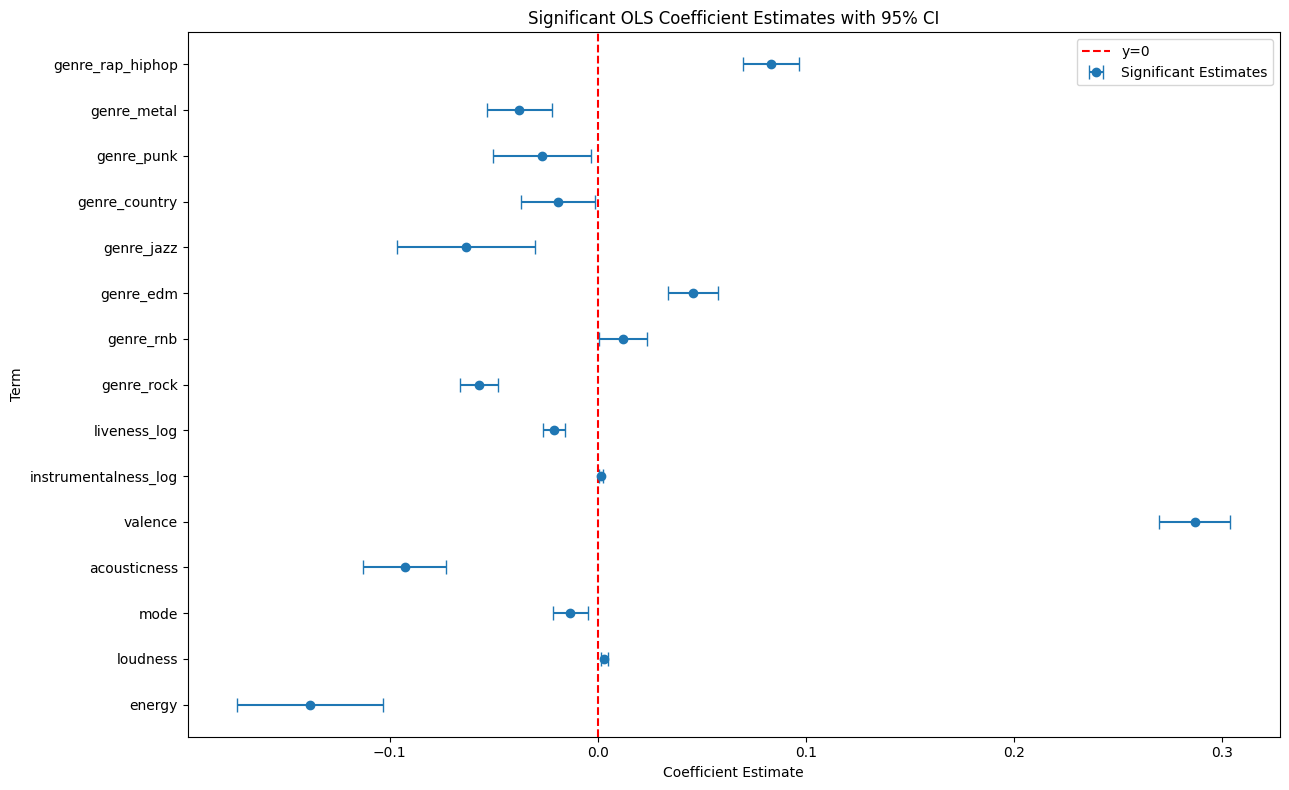

In [62]:
# Filter slopes that are significant (CI does not cross 0)
df_significant = df_slopes[
    (df_slopes['conf_low'] > 0) | (df_slopes['conf_high'] < 0)
]

# Plotting only significant coefficients
plt.figure(figsize=(13, 8))
plt.errorbar(
    df_significant['coef'], 
    df_significant['term'],
    xerr=[df_significant['coef'] - df_significant['conf_low'], df_significant['conf_high'] - df_significant['coef']], 
    fmt='o', 
    capsize=5,
    label='Significant Estimates'
)
plt.axvline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Term')
plt.title('Significant OLS Coefficient Estimates with 95% CI')
plt.legend()
plt.tight_layout()
plt.savefig("tie-plots.png")
plt.show()

Finally, let's remove valence because it is such an outlier.

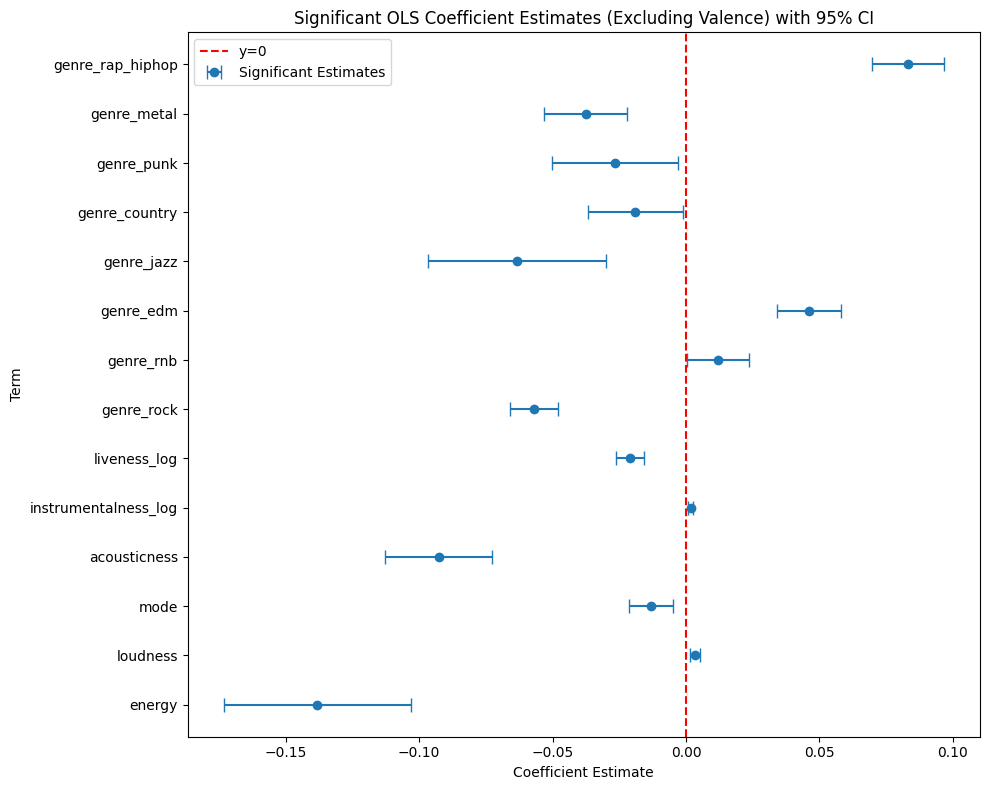

In [54]:
# Filter slopes that are significant and exclude 'valence'
df_significant = df_slopes[
    ((df_slopes['conf_low'] > 0) | (df_slopes['conf_high'] < 0)) &
    (df_slopes['term'] != 'valence')
]

# Plotting only significant coefficients (excluding valence)
plt.figure(figsize=(10, 8))
plt.errorbar(
    df_significant['coef'], 
    df_significant['term'],
    xerr=[df_significant['coef'] - df_significant['conf_low'], df_significant['conf_high'] - df_significant['coef']], 
    fmt='o', 
    capsize=5,
    label='Significant Estimates'
)
plt.axvline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Term')
plt.title('Significant OLS Coefficient Estimates (Excluding Valence) with 95% CI')
plt.legend()
plt.tight_layout()
plt.show()

# E. Interpretation and Recommendation

The above OLS coefficient estimates and their 95% confidence intervals present some interesting findings. The following terms have significant relationships with danceability:
- **genre_rap_hiphop** has a highly significant positive effect, strongly associated with a higher danceability score
- **genre_edm** has a significantly positive effect, associated with a higher danceability score
- **valence** has the strongest positive effect. Tracks with higher valence (i.e. they sound more positive, happy, or cheerful) are associated with a higher value of the dependent variable
- genres for **metal, punk, country, jazz,** and **rock** are associated with a lower danceability score
- **acousticness** has a significant negative effect on danceability
- **energy** has the largest magnitude negative effect. Tracks with higher energy are strongly associated with lower danceability.

### Recommendation